In [167]:
include("MC.jl")

In [169]:
include("viz.jl");

In [2]:
ENV["COLUMNS"] = 200;
const N = 30;

In [3]:
city = "Berlin"

fn_berlin = "irradiation_Berlin.nc"
fn_berlin_w  = "irradiation_Berlin_W.nc";
fn_berlin2020 = "irradiation2020_Berlin.nc"
fn_berlin2020_w  = "irradiation2020_Berlin_W.nc";

In [4]:
test = getCMF0(fn_berlin; raw=1)[2]
test_neib_w = getCMF0(fn_berlin_w; raw=1)[2];

test2020 = getCMF1(fn_berlin2020)
test2020_neib_w = getCMF1(fn_berlin2020_w);

In [5]:
df01 = getDFtm(fn_berlin)
df02 = getDFtm(fn_berlin2020);

In [6]:
df1_train = df01[1:523007, :]
df1_test = df01[523008:end, :]
df2_train = calCMF(df1_train)

data_train = df2_train.real;

In [7]:
data_train_cls, binStarts, binMean = getBins(data_train, N); # city-specific

In [8]:
ticks = rd.(binMean, 2)
xti = (binMean[[1:2:26; 30]], ticks[[1:2:26; 30]]);

### compute DFs

In [71]:
df21 = getDF(2, 1)

17613×12 DataFrame
   Row │ time                 month  ghi        ghiCS      real      pers      neib      pred      real_cls  dif_pers     dif_neib    dif_pred    
       │ DateTime             Int8   Float64    Float64    Float64   Float64   Float64   Float64   Int64     Float64      Float64     Float64     
───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2019-01-01T08:00:00      1   1.95644    7.26123   0.269437  0.435162  0.622668  0.437789         3   0.165725     0.353231    0.168352
     2 │ 2019-01-01T08:15:00      1   2.19264   12.8464    0.170682  0.269437  0.812441  0.263847         1   0.0987544    0.641759    0.0931648
     3 │ 2019-01-01T08:30:00      1   2.67955   18.7448    0.142949  0.170682  0.577954  0.245249         1   0.0277334    0.435005    0.1023
     4 │ 2019-01-01T08:45:00      1   3.72535   24.6236    0.151292  0.142949  0.40955   0.213818         1  -0.00834314   0.258258    0.0625262
     5 │ 2019-01-01T09:00:00      1   7.27156   30.2799    0.240145  0.151292  0.188798  0.213818         2  -0.0888532   -0.0513477  -0.026327
     6 │ 2019-01-01T09:15:00      1   8.06943   35.4893    0.227377  0.240145  0.147695  0.281747         2   0.0127687   -0.0796814   0.05437
     7 │ 2019-01-01T09:30:00      1   7.34271   40.1676    0.182802  0.227377  0.13582   0.246403         1   0.0445747   -0.0469821   0.0636016
     8 │ 2019-01-01T09:45:00      1   8.05224   44.348     0.18157   0.182802  0.144917  0.219746         1   0.00123228  -0.0366527   0.0381767
     9 │ 2019-01-01T10:00:00      1   8.64267   47.994     0.180078  0.18157   0.117192  0.213818         1   0.00149155  -0.0628862   0.0337402
    10 │ 2019-01-01T10:15:00      1   9.09165   51.0505    0.178091  0.180078  0.100783  0.213818         1   0.00198684  -0.0773083   0.0357271
    11 │ 2019-01-01T10:30:00      1   9.87164   53.4788    0.18459   0.178091  0.10863   0.213818         1  -0.00649838  -0.0759591   0.0292287
   ⋮   │          ⋮             ⋮        ⋮          ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮           ⋮            ⋮
 17604 │ 2019-12-31T12:45:00     12  16.2905    46.3818    0.351226  0.371119  0.279701  0.380428         7   0.0198928   -0.0715251   0.0292019
 17605 │ 2019-12-31T13:00:00     12  15.3952    42.1271    0.365446  0.351226  0.271922  0.386635         7  -0.0142201   -0.093524    0.0211884
 17606 │ 2019-12-31T13:15:00     12  16.1721    37.3361    0.433149  0.365446  0.29481   0.386635         9  -0.0677031   -0.138339   -0.0465147
 17607 │ 2019-12-31T13:30:00     12  16.2092    32.0782    0.505302  0.433149  0.335291  0.48402         11  -0.0721527   -0.170011   -0.021282
 17608 │ 2019-12-31T13:45:00     12  15.6477    26.4489    0.591621  0.505302  0.393995  0.569766        12  -0.0863193   -0.197627   -0.0218553
 17609 │ 2019-12-31T14:00:00     12  13.442     20.5831    0.65306   0.591621  0.46773   0.598229        14  -0.0614382   -0.18533    -0.0548304
 17610 │ 2019-12-31T14:15:00     12  10.5106    14.6785    0.716053  0.65306   0.513913  0.693071        15  -0.0629933   -0.20214    -0.0229814
 17611 │ 2019-12-31T14:30:00     12   6.44924    9.03278   0.713982  0.716053  0.624106  0.721304        15   0.00207112  -0.0898753   0.00732246
 17612 │ 2019-12-31T14:45:00     12   3.42109    4.11305   0.831763  0.713982  0.677246  0.714744        19  -0.117782    -0.154517   -0.117019
 17613 │ 2019-12-31T15:00:00     12   0.644611   0.702981  0.916968  0.831763  0.638925  0.810114        23  -0.0852047   -0.278043   -0.106854
                                                                                                                                17592 rows omitted

In [73]:
df22 = getDF(2, 2)
df23 = getDF(2, 3)
df24 = getDF(2, 4);

In [74]:
df21_2020 = getDF(2, 1; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)

17634×12 DataFrame
   Row │ time                 month  ghi       ghiCS      real      pers      neib      pred      real_cls  dif_pers     dif_neib     dif_pred     
       │ DateTime             Int8   Float64   Float64    Float64   Float64   Float64   Float64   Int64     Float64      Float64      Float64      
───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2020-01-01T08:00:00      1   6.11257   7.4498    0.820501  0.622607  0.620296  0.660559        19  -0.197893    -0.200205    -0.159942
     2 │ 2020-01-01T08:15:00      1   7.99856  12.9304    0.618588  0.820501  0.819034  0.81843         13   0.201913     0.200446     0.199842
     3 │ 2020-01-01T08:30:00      1   9.64207  18.7671    0.513775  0.618588  0.613148  0.596779        11   0.104813     0.0993733    0.0830044
     4 │ 2020-01-01T08:45:00      1   9.37202  24.6433    0.380308  0.513775  0.522088  0.524501         8   0.133467     0.14178      0.144193
     5 │ 2020-01-01T09:00:00      1  11.5218   30.3431    0.379717  0.380308  0.413909  0.411875         8   0.00059065   0.0341917    0.0321577
     6 │ 2020-01-01T09:15:00      1  14.7725   35.6156    0.414777  0.379717  0.461792  0.415747         9  -0.0350597    0.0470154    0.000970584
     7 │ 2020-01-01T09:30:00      1  15.687    40.3467    0.388806  0.414777  0.501669  0.473733         8   0.0259702    0.112863     0.0849263
     8 │ 2020-01-01T09:45:00      1  15.4328   44.5628    0.346315  0.388806  0.47676   0.410363         6   0.0424916    0.130445     0.0640483
     9 │ 2020-01-01T10:00:00      1  15.8647   48.211     0.329067  0.346315  0.431159  0.356054         6   0.0172478    0.102092     0.0269866
    10 │ 2020-01-01T10:15:00      1  19.6424   51.2647    0.383156  0.329067  0.411582  0.353071         8  -0.0540887    0.028426    -0.0300849
    11 │ 2020-01-01T10:30:00      1  24.0906   53.6805    0.448777  0.383156  0.504287  0.446911        10  -0.0656216    0.0555097   -0.00186673
   ⋮   │          ⋮             ⋮       ⋮          ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮            ⋮
 17625 │ 2020-12-31T12:45:00     12  36.4291   46.3627    0.785741  0.837679  0.824121  0.808923        17   0.0519375    0.0383798    0.0231821
 17626 │ 2020-12-31T13:00:00     12  31.5607   42.1503    0.748764  0.785741  0.811596  0.7382          16   0.0369768    0.0628313   -0.010564
 17627 │ 2020-12-31T13:15:00     12  28.0762   37.4102    0.750495  0.748764  0.8062    0.730529        16  -0.00173121   0.0557042   -0.0199661
 17628 │ 2020-12-31T13:30:00     12  25.564    32.2062    0.793761  0.750495  0.83521   0.743275        18  -0.0432651    0.0414489   -0.0504854
 17629 │ 2020-12-31T13:45:00     12  22.0262   26.6249    0.827278  0.793761  0.842924  0.801412        19  -0.0335177    0.0156454   -0.0258661
 17630 │ 2020-12-31T14:00:00     12  17.8653   20.7884    0.859392  0.827278  0.846249  0.824798        21  -0.0321135   -0.0131433   -0.0345935
 17631 │ 2020-12-31T14:15:00     12  12.7699   14.8768    0.858381  0.859392  0.864633  0.85903         21   0.00101054   0.00625202   0.000649094
 17632 │ 2020-12-31T14:30:00     12   7.58499   9.17129   0.827036  0.858381  0.859     0.847669        19   0.0313449    0.0319636    0.0206325
 17633 │ 2020-12-31T14:45:00     12   2.93009   4.13053   0.709375  0.827036  0.828111  0.795721        15   0.117662     0.118736     0.0863459
 17634 │ 2020-12-31T15:00:00     12   0.17233   0.624335  0.276022  0.709375  0.709674  0.66215          4   0.433352     0.433652     0.386128
                                                                                                                                 17613 rows omitted

In [75]:
df22_2020 = getDF(2, 2; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df23_2020 = getDF(2, 3; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df24_2020 = getDF(2, 4; df_test=df02, d_test=test2020, d_neib=test2020_neib_w);

In [76]:
df1t = hybrid(df21, df21_2020, 1) # df test 2020 include all difs

17634×18 DataFrame
   Row │ time                 month  ghi       ghiCS      real      pers      neib      pred      real_cls  dif_pers     dif_neib     dif_pred      mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m   ⋯
       │ DateTime             Int8   Float64   Float64    Float64   Float64   Float64   Float64   Int64     Float64      Float64      Float64       Int64    Float64   Int64     Float64   Float64     ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2020-01-01T08:00:00      1   6.11257   7.4498    0.820501  0.622607  0.620296  0.660559        19  -0.197893    -0.200205    -0.159942           0  0.622607         0  0.622607  -0.197893   ⋯
     2 │ 2020-01-01T08:15:00      1   7.99856  12.9304    0.618588  0.820501  0.819034  0.81843         13   0.201913     0.200446     0.199842           3  0.81843          3  0.81843    0.199842
     3 │ 2020-01-01T08:30:00      1   9.64207  18.7671    0.513775  0.618588  0.613148  0.596779        11   0.104813     0.0993733    0.0830044          3  0.596779         3  0.596779   0.0830044
     4 │ 2020-01-01T08:45:00      1   9.37202  24.6433    0.380308  0.513775  0.522088  0.524501         8   0.133467     0.14178      0.144193           3  0.524501         3  0.524501   0.144193
     5 │ 2020-01-01T09:00:00      1  11.5218   30.3431    0.379717  0.380308  0.413909  0.411875         8   0.00059065   0.0341917    0.0321577          3  0.411875         3  0.411875   0.0321577  ⋯
     6 │ 2020-01-01T09:15:00      1  14.7725   35.6156    0.414777  0.379717  0.461792  0.415747         9  -0.0350597    0.0470154    0.000970584        3  0.415747         3  0.415747   0.00097058
     7 │ 2020-01-01T09:30:00      1  15.687    40.3467    0.388806  0.414777  0.501669  0.473733         8   0.0259702    0.112863     0.0849263          3  0.473733         3  0.473733   0.0849263
     8 │ 2020-01-01T09:45:00      1  15.4328   44.5628    0.346315  0.388806  0.47676   0.410363         6   0.0424916    0.130445     0.0640483          3  0.410363         3  0.410363   0.0640483
     9 │ 2020-01-01T10:00:00      1  15.8647   48.211     0.329067  0.346315  0.431159  0.356054         6   0.0172478    0.102092     0.0269866          1  0.346315         1  0.346315   0.0172478  ⋯
    10 │ 2020-01-01T10:15:00      1  19.6424   51.2647    0.383156  0.329067  0.411582  0.353071         8  -0.0540887    0.028426    -0.0300849          1  0.329067         1  0.329067  -0.0540887
    11 │ 2020-01-01T10:30:00      1  24.0906   53.6805    0.448777  0.383156  0.504287  0.446911        10  -0.0656216    0.0555097   -0.00186673         3  0.446911         3  0.446911  -0.00186673
   ⋮   │          ⋮             ⋮       ⋮          ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮            ⋮           ⋮        ⋮         ⋮         ⋮           ⋮      ⋱
 17625 │ 2020-12-31T12:45:00     12  36.4291   46.3627    0.785741  0.837679  0.824121  0.808923        17   0.0519375    0.0383798    0.0231821          1  0.837679         1  0.837679   0.0519375
 17626 │ 2020-12-31T13:00:00     12  31.5607   42.1503    0.748764  0.785741  0.811596  0.7382          16   0.0369768    0.0628313   -0.010564           3  0.7382           3  0.7382    -0.010564   ⋯
 17627 │ 2020-12-31T13:15:00     12  28.0762   37.4102    0.750495  0.748764  0.8062    0.730529        16  -0.00173121   0.0557042   -0.0199661          3  0.730529         3  0.730529  -0.0199661
 17628 │ 2020-12-31T13:30:00     12  25.564    32.2062    0.793761  0.750495  0.83521   0.743275        18  -0.0432651    0.0414489   -0.0504854          3  0.743275         3  0.743275  -0.0504854
 17629 │ 2020-12-31T13:45:00     12  22.0262   26.6249    0.827278  0.793761  0.842924  0.801412        19  -0.0335177    0.0156454   -0.0258661          3  0.801412         3  0.801412  -0.02586

In [77]:
df2t = hybrid(df22, df22_2020, 2)
df3t = hybrid(df23, df23_2020, 3)
df4t = hybrid(df24, df24_2020, 4);

### std 
#### by num of class

In [36]:
function std_nc(nc, steps)
    data_train_cls, binStarts, binMean = getBins(data_train, nc) 
    println(length(binStarts))
    df = getDF(2, steps; n=nc, data_train_cls=data_train_cls, binStarts=binStarts, binMean=binMean)
    df_2020 = getDF(2, steps; n=nc, data_train_cls=data_train_cls, binStarts=binStarts, binMean=binMean,
        df_test=df02, d_test=test2020, d_neib=test2020_neib_w) 
    return std(df_2020.dif_pred)
end

std_nc (generic function with 1 method)

In [37]:
stds1 = []
stds2 = []
stds3 = []
stds4 = []
for n in 5:5:40
    st1 = std_nc(n, 1)
    st2 = std_nc(n, 2)
    st3 = std_nc(n, 3)
    st4 = std_nc(n, 4)
    push!(stds1, st1)
    push!(stds2, st2)
    push!(stds3, st3)
    push!(stds4, st4)
end

6
6
6
6
11
11
11
11
16
16
16
16
21
21
21
21
26
26
26
26
31
31
31
31
36
36
36
36
41
41
41
41


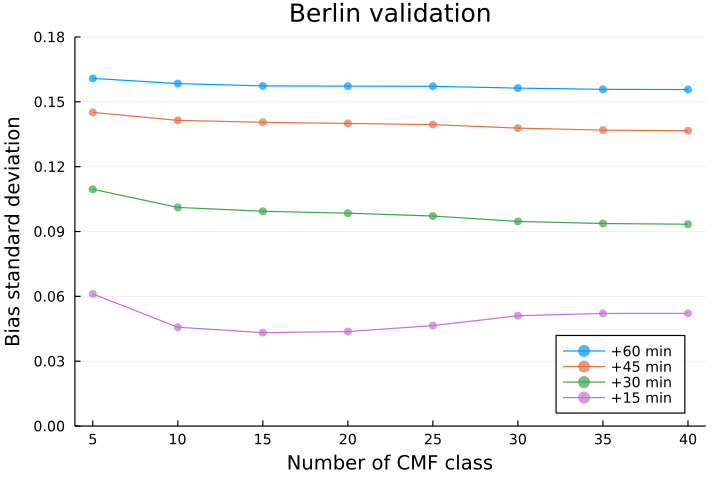

In [35]:
plot(5:5:40, [stds4 stds3 stds2 stds1], marker=(0.7, stroke(0)), ylim=(0,0.18), grid=:y,
    lab=["+60 min" "+45 min" "+30 min" "+15 min"], leg=:bottomright, 
    xticks=5:5:40, xlabel="Number of CMF class", ylabel="Bias standard deviation", title=city*" validation")

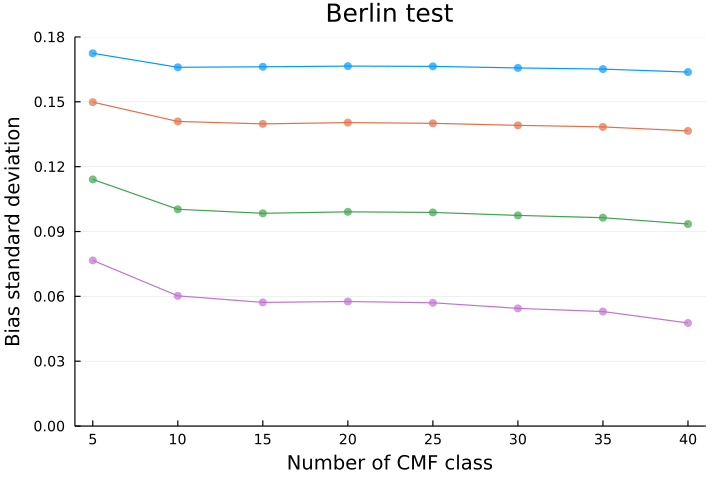

In [39]:
plot(5:5:40, [stds4 stds3 stds2 stds1], marker=(0.7, stroke(0)), ylim=(0,0.18), grid=:y,
    lab=["+60 min" "+45 min" "+30 min" "+15 min"], leg=:none, 
    xticks=5:5:40, xlabel="Number of CMF class", ylabel="Bias standard deviation", title=city*" test")

#### by order

In [281]:
std1od = []
std2od = []
std3od = []
for st in 1:4
    df1 = getDF(1, st)
    df2 = getDF(2, st)
    df3 = getDF(3, st)
    push!(std1od, std(df1.dif_pred))
    push!(std2od, std(df2.dif_pred))
    push!(std3od, std(df3.dif_pred))
end

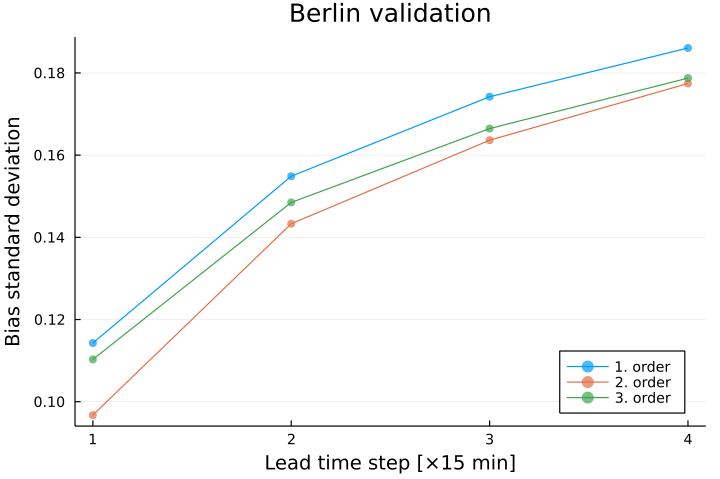

In [282]:
plot(1:4, [std1od std2od std3od], marker=(0.7, stroke(0)), grid=:y,
    lab=["1. order" "2. order" "3. order"], leg=:bottomright, 
    xlabel="Lead time step [×15 min]", ylabel="Bias standard deviation", title=city*" validation")

In [277]:
std1od = []
std2od = []
std3od = []
for st in 1:4
    df1 = getDF(1, st; n=N, data_train_cls=data_train_cls, binStarts=binStarts, binMean=binMean,
        df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
    df2 = getDF(2, st; n=N, data_train_cls=data_train_cls, binStarts=binStarts, binMean=binMean,
        df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
    df3 = getDF(3, st; n=N, data_train_cls=data_train_cls, binStarts=binStarts, binMean=binMean,
        df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
    push!(std1od, std(df1.dif_pred))
    push!(std2od, std(df2.dif_pred))
    push!(std3od, std(df3.dif_pred))
end

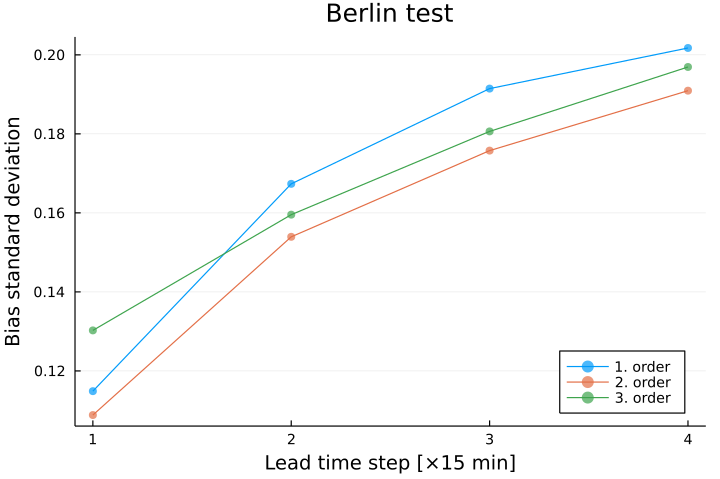

In [280]:
plot(1:4, [std1od std2od std3od], marker=(0.7, stroke(0)), grid=:y,
    lab=["1. order" "2. order" "3. order"], leg=:bottomright, 
    xlabel="Lead time step [×15 min]", ylabel="Bias standard deviation", title=city*" test")

In [261]:
df11 = getDF(1, 1)
df12 = getDF(1, 2)
df13 = getDF(1, 3)
df14 = getDF(1, 4)

In [267]:
df31 = getDF(3, 1)
df32 = getDF(3, 2)
df33 = getDF(3, 3)
df34 = getDF(3, 4)

### std dev

In [78]:
# apply time steps
aplTs(df, func) = combine(df, :dif_pers => func => :pers, :dif_neib => func => :neib, :dif_pred => func => :pred, 
    :dif_hyb_m => func => :hyb_m, :dif_hyb_r => func => :hyb_r)

aplTs (generic function with 1 method)

In [26]:
col1 = combine(df2t, :dif_pred_n => mean => :pred_n)
append!(col1, combine(df3t, :dif_pred_n => mean => :pred_n))
append!(col1, combine(df4t, :dif_pred_n => mean => :pred_n))

col2 = reshape([NaN; Array(col1)], 4);

mns = aplTs(df1t, mean)
append!(mns, aplTs(df2t, mean))
append!(mns, aplTs(df3t, mean))
append!(mns, aplTs(df4t, mean));

insertcols!(mns, 4, :pred_n => col2)

In [79]:
sds = aplTs(df1t, std)
append!(sds, aplTs(df2t, std))
append!(sds, aplTs(df3t, std))
append!(sds, aplTs(df4t, std));

col3 = combine(df2t, :dif_pred_n => std => :pred_n)
append!(col3, combine(df3t, :dif_pred_n => std => :pred_n))
append!(col3, combine(df4t, :dif_pred_n => std => :pred_n))

col4 = reshape([NaN; Array(col3)], 4);

insertcols!(sds, 4, :pred_n => col4)

4×6 DataFrame
 Row │ pers      neib      pred      pred_n      hyb_m     hyb_r    
     │ Float64   Float64   Float64   Float64     Float64   Float64  
─────┼──────────────────────────────────────────────────────────────
   1 │ 0.113201  0.125717  0.108829  NaN         0.109146  0.108712
   2 │ 0.162768  0.166787  0.153942    0.16371   0.153504  0.148392
   3 │ 0.184951  0.184282  0.175759    0.189116  0.166448  0.16438
   4 │ 0.199795  0.197751  0.19093     0.204107  0.180372  0.179403

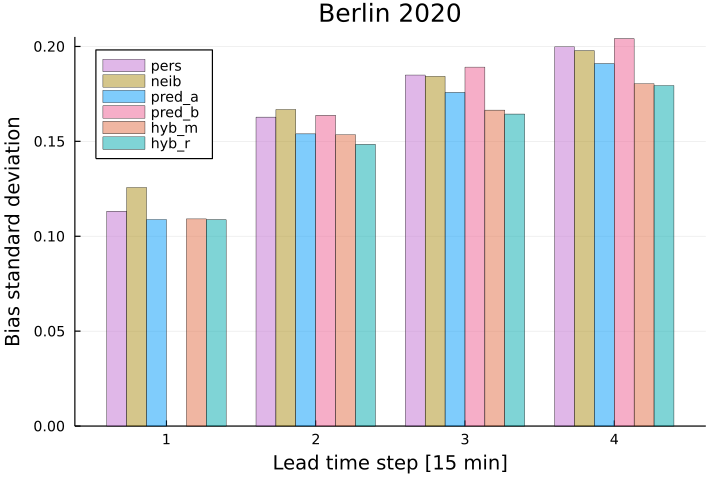

In [80]:
# new
gb_be = groupedbar(Matrix(sds), leg=:topleft, label=["pers" "neib" "pred_a" "pred_b" "hyb_m" "hyb_r"],
    c=[4 5 1 7 2 6], lw=0.3, fillalpha=0.5, grid=:y, 
    ylim=(0, 0.205), xlabel="Lead time step [15 min]", ylabel="Bias standard deviation", title=city*" 2020")

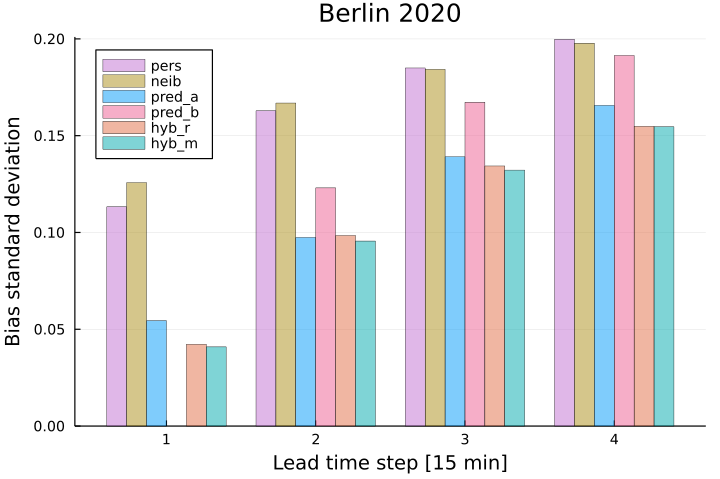

In [70]:
gb_be = groupedbar(Matrix(sds), leg=:topleft, label=["pers" "neib" "pred_a" "pred_b" "hyb_r" "hyb_m"],
    c=[4 5 1 7 2 6], lw=0.3, fillalpha=0.5, grid=:y, 
    ylim=(0, 0.201), xlabel="Lead time step [15 min]", ylabel="Bias standard deviation", title=city*" 2020")

In [37]:
gb1 = groupedbar(Matrix(mns), leg=:none, 
    c=[4 5 1 2 6], ylim=(0, 0.0205), ylabel="Bias mean")

gb2 = groupedbar(Matrix(sds), leg=:topleft, label=["pers" "neib" "pred" "hyb_r" "hyb_m"],
    c=[4 5 1 2 6],
    ylim=(0, 0.201), ylabel="Bias standard deviation");

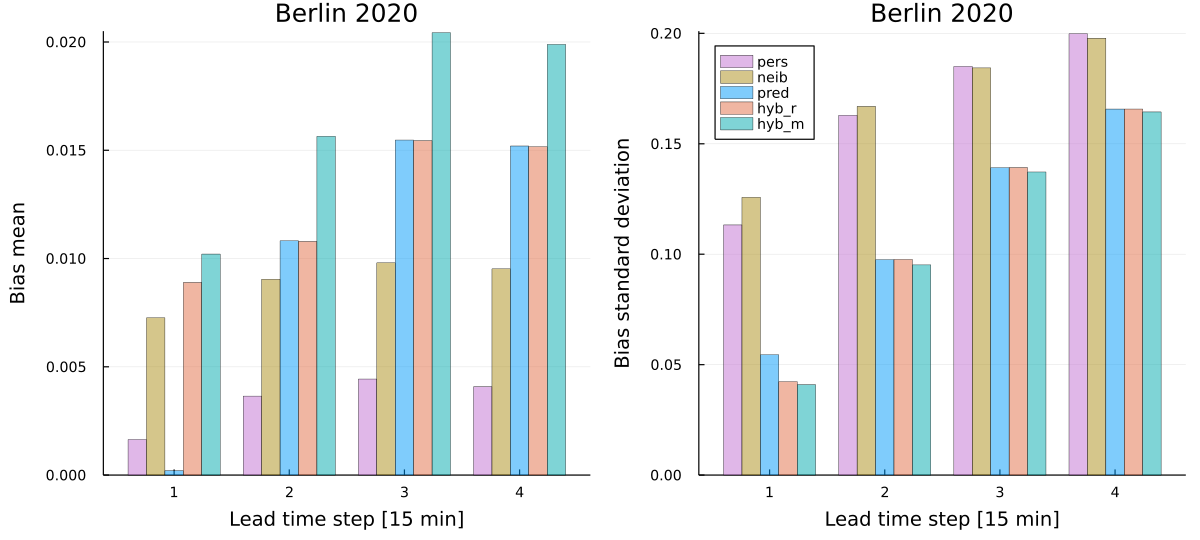

In [38]:
gbs = plot(gb1, gb2, layout=@layout([a b]), lw=0.3, fillalpha=0.5, grid=:y,
    xlabel="Lead time step [15 min]", title="Berlin 2020",
    leftmargin=20px, bottommargin=20px, size=(1000, 450))

### Monthly avg

In [12]:
gb = groupby(df1t, :month)
ghi_mo = [mean(g.ghi) for g in gb]
cmf_mo = [mean(g.real) for g in gb]

12-element Vector{Float64}:
 0.5387943836574419
 0.4768504729681436
 0.6526188725505371
 0.8150276117045487
 0.6896084693453719
 0.6867055105079485
 0.6889898886404564
 0.732198854754194
 0.7208293212411354
 0.5217254906093799
 0.5403768196896163
 0.5421718508040657

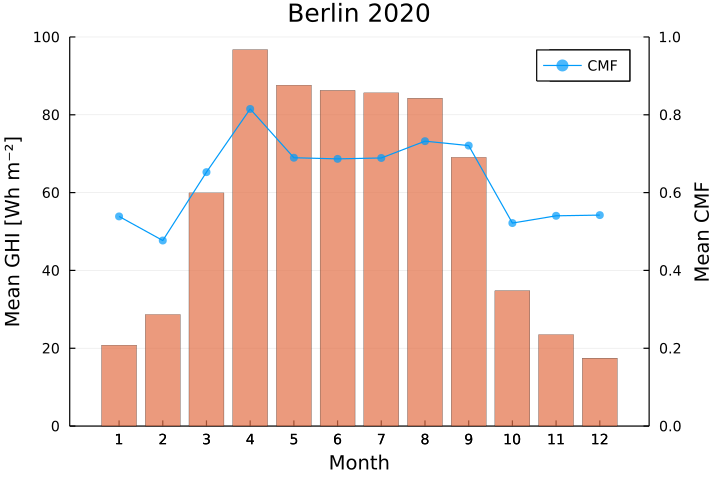

In [16]:
avg_be = bar(ghi_mo, c=2, lw=0.2, fillalpha=0.7, grid=:y, right_margin=1.3cm,
    xtick=1:12, ytick=0:20:100, ylim=(0,100), 
    xlabel="Month", ylabel="Mean GHI [Wh m⁻²]", title=city*" 2020")
plot!(twinx(), cmf_mo, marker=(0.7, stroke(0)), 
    xtick=1:12, ylim=(0,1), label="CMF", ylabel="Mean CMF") 

### distri

In [17]:
h_train = histogram(data_train, bins=binStarts, xticks=xti, ylabel="Counts",
    title=city*" training")

h_vali = histogram(df21.real, bins=binStarts, xticks=xti, 
    title="validation")

h_test = histogram(df21_2020.real, bins=binStarts, xticks=xti, 
    title="test");

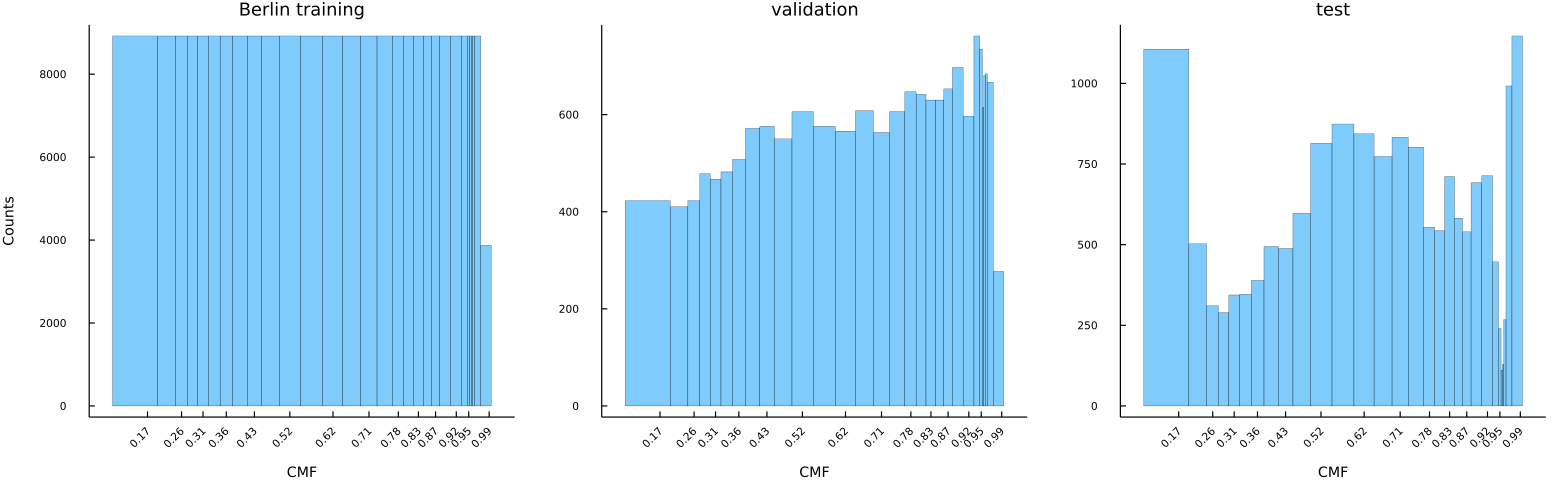

In [18]:
hists = plot(h_train, h_vali, h_test, layout=@layout([a b c]), leg=false, grid=false, xlabel="CMF", xrotation=45, 
    lw=0.2, fillalpha=0.5, labelfontsize=8, titlefontsize=10, tickfontsize=6, ylim=(0, ),
    leftmargin=20px, bottommargin=20px, size=(1300,400))

### heatmaps

#### train

In [42]:
# rewrite transition matrix
state = data_train_cls
len = length(state)
T2 = zeros(N, N, N) # 2. od
for i in 2:len-1
    T2[state[i-1], state[i], state[i+1]] += 1
end
sumZ = sum(T2; dims=3)
T22 = T2./sumZ
T_train = sum([T22[:, :, i] * binMean[i] for i in 1:30]);

30×30 Matrix{Float64}:
   0.213818    0.281747    0.314274  0.338495  0.37369   0.420056  0.463879  0.494226  0.520531  …  NaN         NaN         NaN           0.430793  NaN         NaN         NaN         0.915987
   0.219746    0.246403    0.296921  0.328775  0.376172  0.40379   0.444227  0.482014  0.544883       0.888606    0.666498  NaN           0.396424    0.396424  NaN           0.947112  0.966057
   0.245249    0.250008    0.276249  0.328667  0.35264   0.384202  0.43275   0.490463  0.492647       0.642515    0.587929    0.606445    0.67339   NaN           0.447733  NaN         0.942857
   0.237517    0.260379    0.271684  0.299544  0.352263  0.375359  0.420396  0.470483  0.496743       0.693367    0.786182    0.780998  NaN           0.950541    0.509034    0.876105  0.97409
   0.254423    0.278164    0.282097  0.299934  0.324791  0.383228  0.412923  0.447832  0.488569       0.881134    0.683682    0.800293    0.790752    0.430793  NaN           0.93093   0.925542
   0.255008  

#### test

In [25]:
s_t_2 = df21.pers_cls
s_t_1 = df21.real_cls
pred = df21.pred;

T, T_ct = zeros(N, N), zeros(N, N)
len = length(pred)
for i in 1:len-1
    T[s_t_2[i], s_t_1[i]] += pred[i+1]
    T_ct[s_t_2[i], s_t_1[i]] += 1
end

T_test = T ./ T_ct;

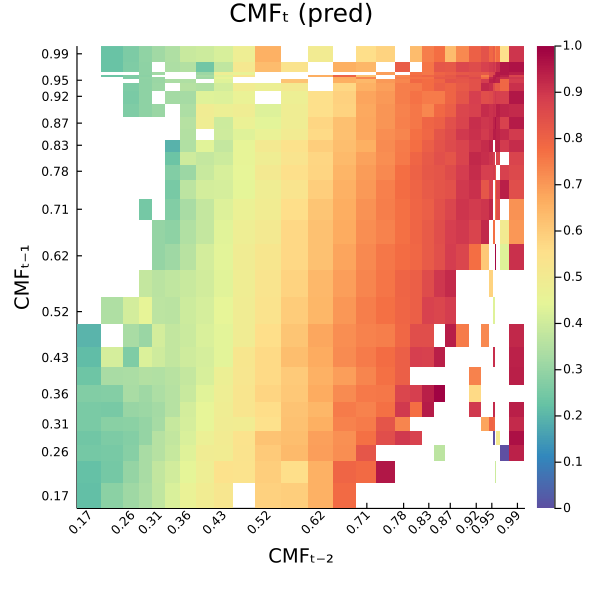

In [38]:
hm_test = heatmap(binMean, binMean, T_test, c=cgrad(:Spectral_10, rev=true), clim=(0,1), grid=false, 
    title="CMFₜ (pred)", size=(500,500), tickfontsize=7,
    xticks=xti, yticks=xti, xrotation=45, 
    xlabel="CMFₜ₋₂", ylabel="CMFₜ₋₁")

### dif CMF vs Err

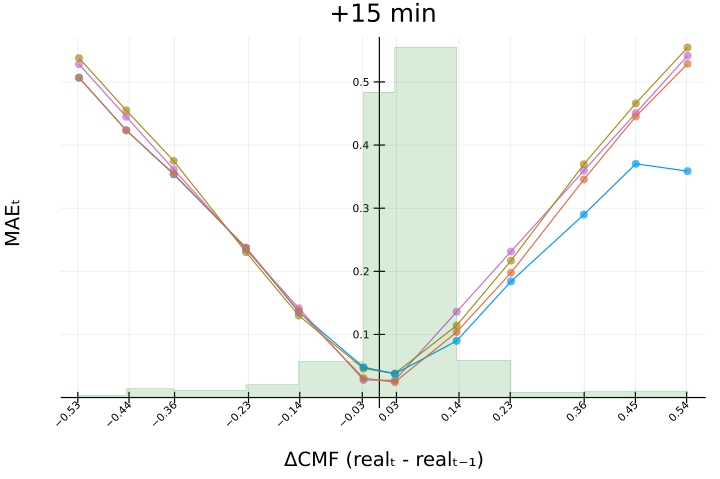

In [157]:
diff1 = viz_dif1(df1t, 1)

In [158]:
diff2 = viz_dif1(df2t, 2)
diff3 = viz_dif1(df3t, 3)
diff4 = viz_dif1(df4t, 4);

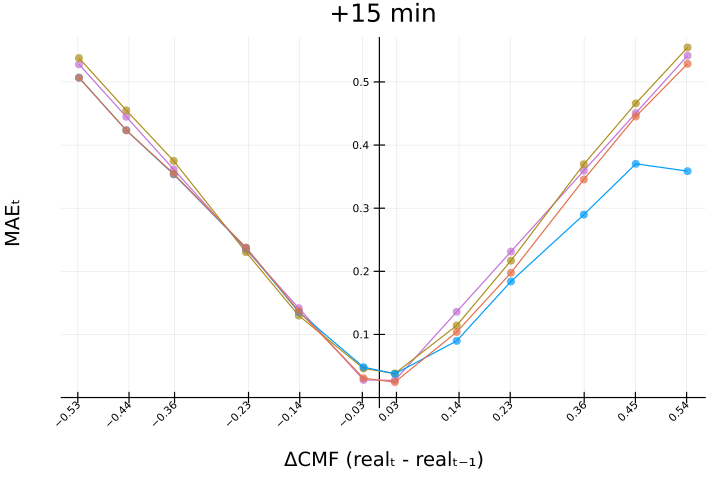

In [92]:
dif1 = viz_dif(df1t, 1)

In [95]:
dif2 = viz_dif(df2t, 2)
dif3 = viz_dif(df3t, 3)
dif4 = viz_dif(df4t, 4)

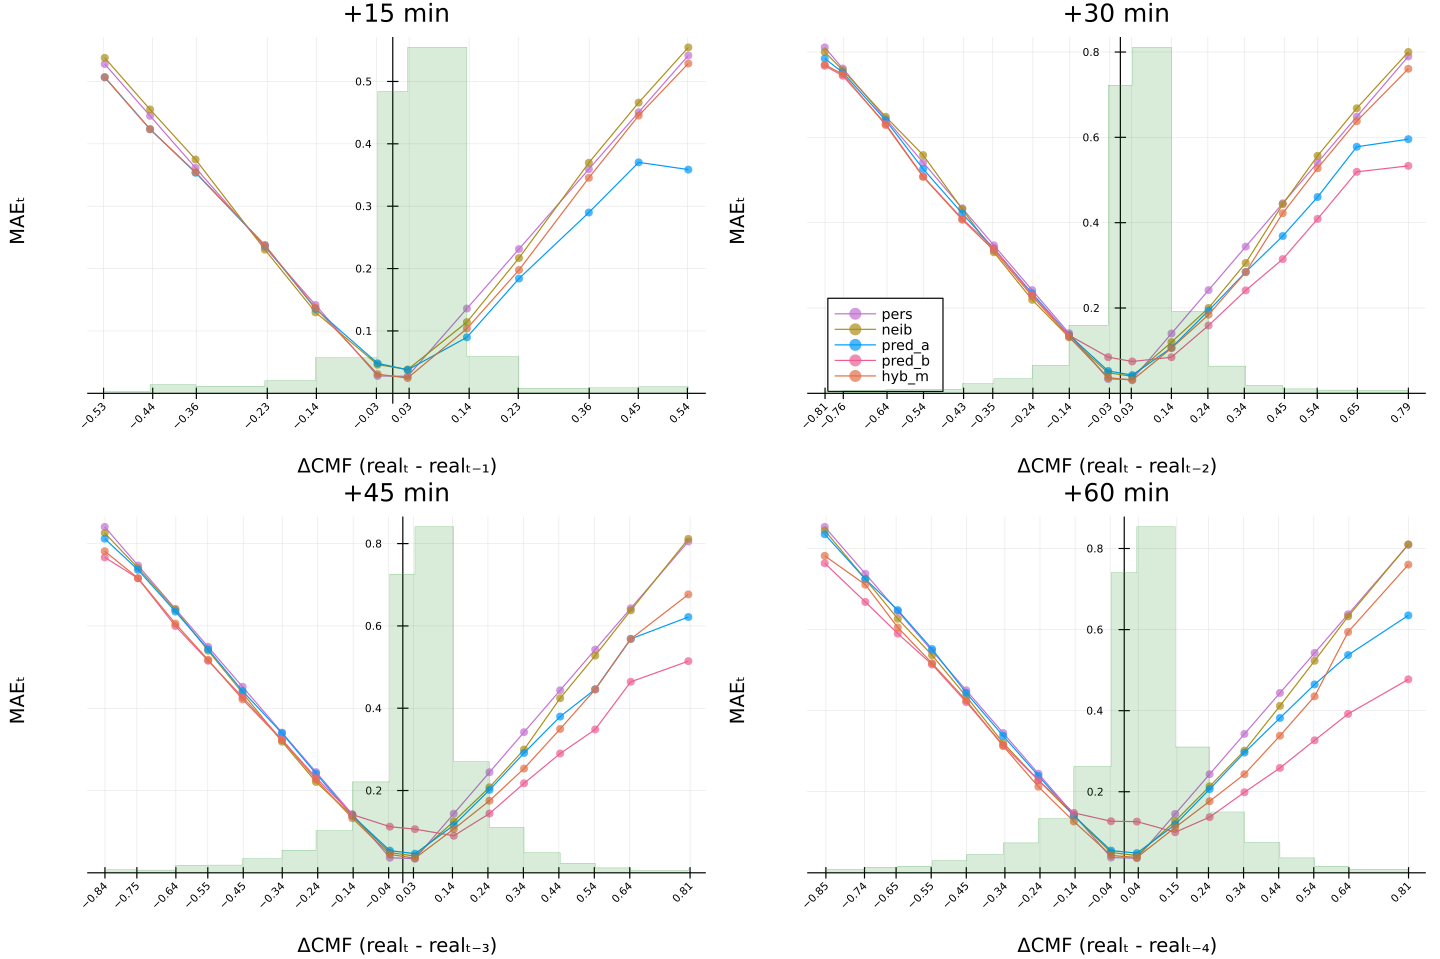

In [159]:
difs = plot(diff1, diff2, diff3, diff4, layout=@layout([a b; c d]), size=(1200, 800), #ylim=(0, 1.01), 
    leftmargin=20px, ylabel="MAEₜ")

### mn ± sd histo

In [41]:
h21 = hist_dif_pred_pers(df21, 2, 1)
h22 = hist_dif_pred_pers(df22, 2, 2)

In [43]:
h21_cls = hist_cls_dif_pred_pers(df21, 2, 1)
h22_cls = hist_cls_dif_pred_pers(df22, 2, 2)

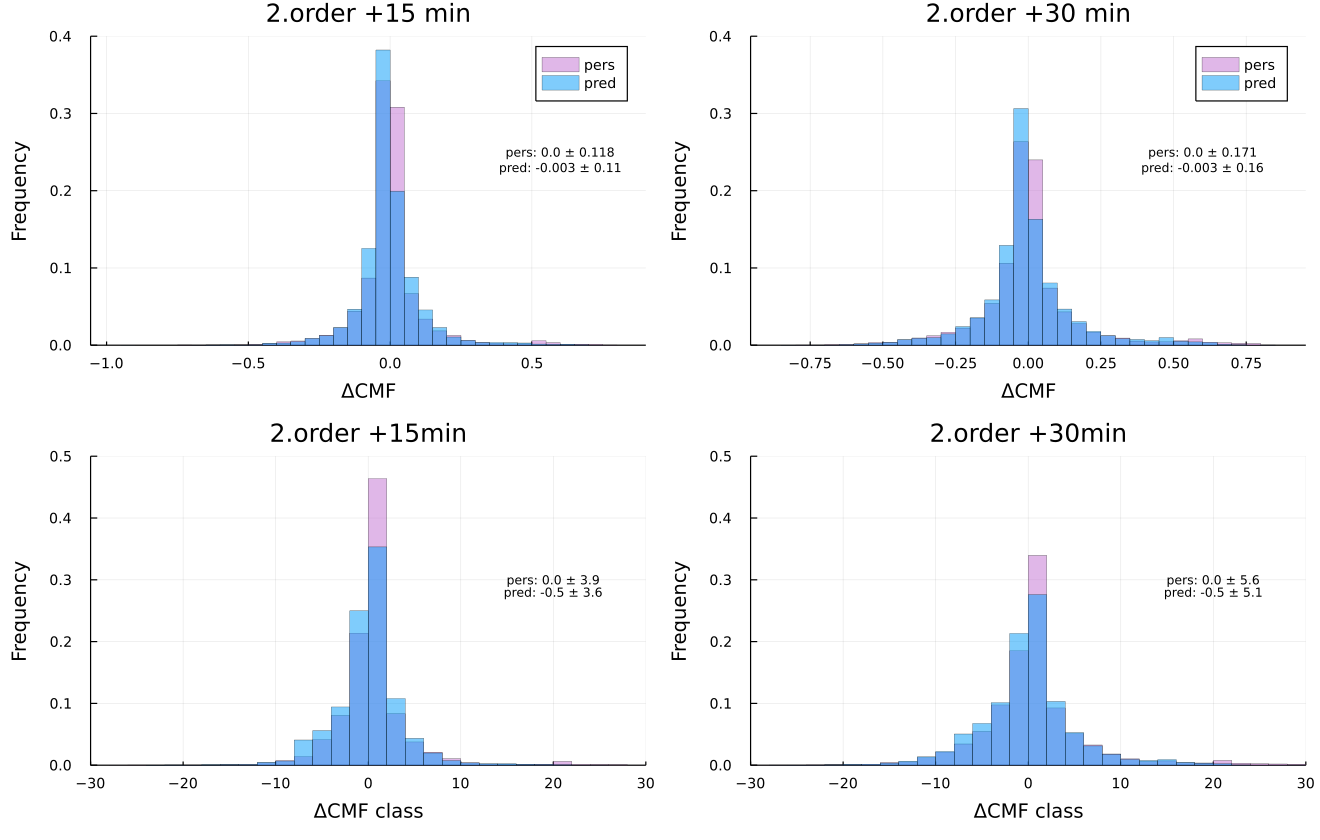

In [49]:
hists = plot(h21, h22, h21_cls, h22_cls, layout=@layout([a b; c d]), 
    leftmargin=20px, bottommargin=20px, dpi=120, fmt=:png, size=(1100,700))

In [61]:
h23_cls = hist_cls_dif_pred_pers(df23, 2, 3)
h24_cls = hist_cls_dif_pred_pers(df24, 2, 4);

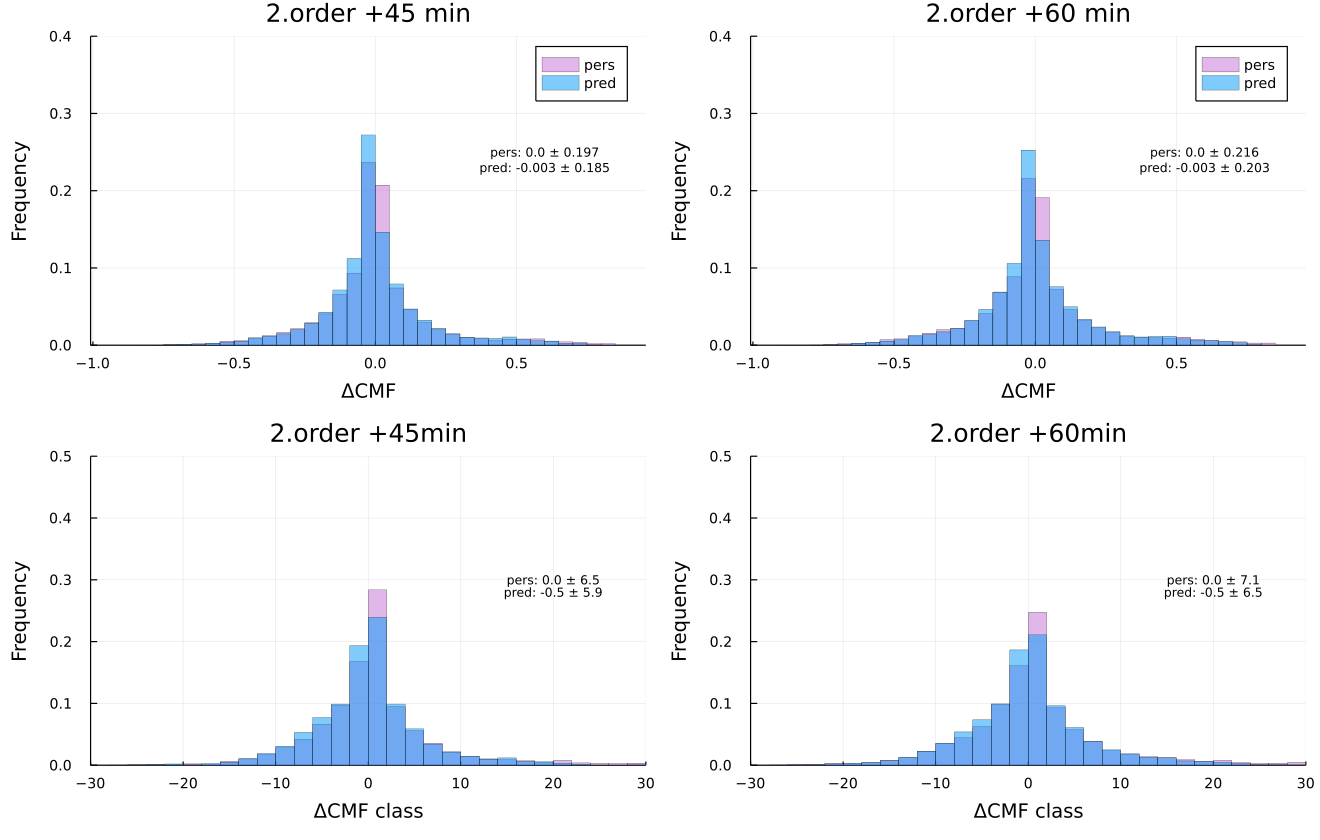

In [62]:
hists34 = plot(h23, h24, h23_cls, h24_cls, layout=@layout([a b; c d]), 
    leftmargin=20px, bottommargin=20px, dpi=120, fmt=:png, size=(1100,700))

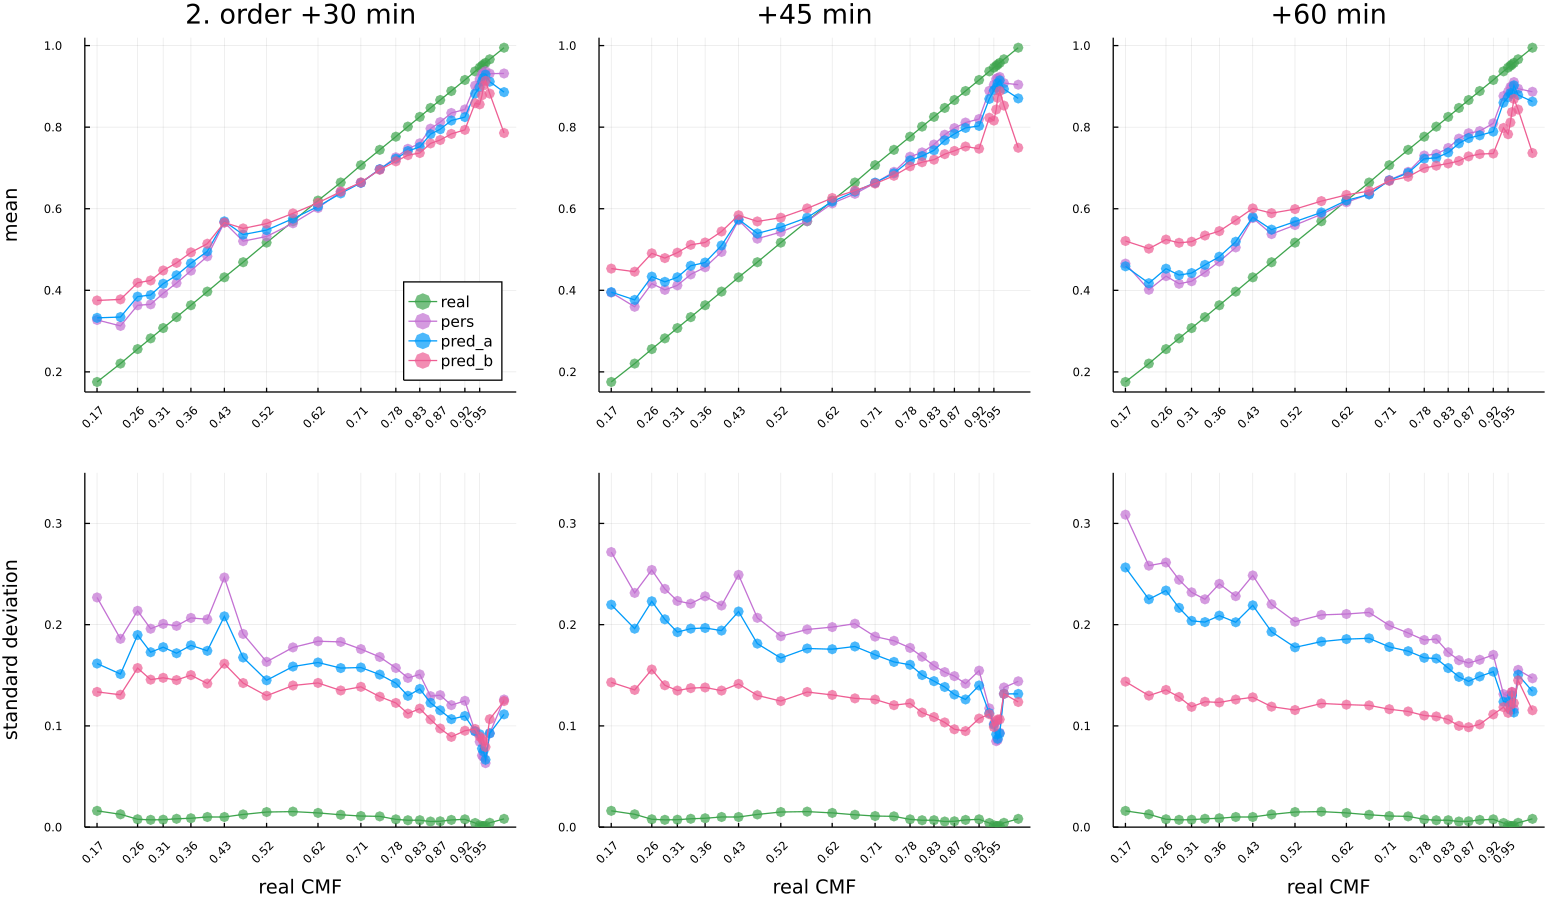

In [30]:
p = plot(mn2, mn3, mn4, sd2, sd3, sd4, layout=@layout([a b c; d e f]), marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b"],
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10,
    leftmargin=15px, bottommargin=15px, dpi=130, fmt=:png, size=(1200,700))

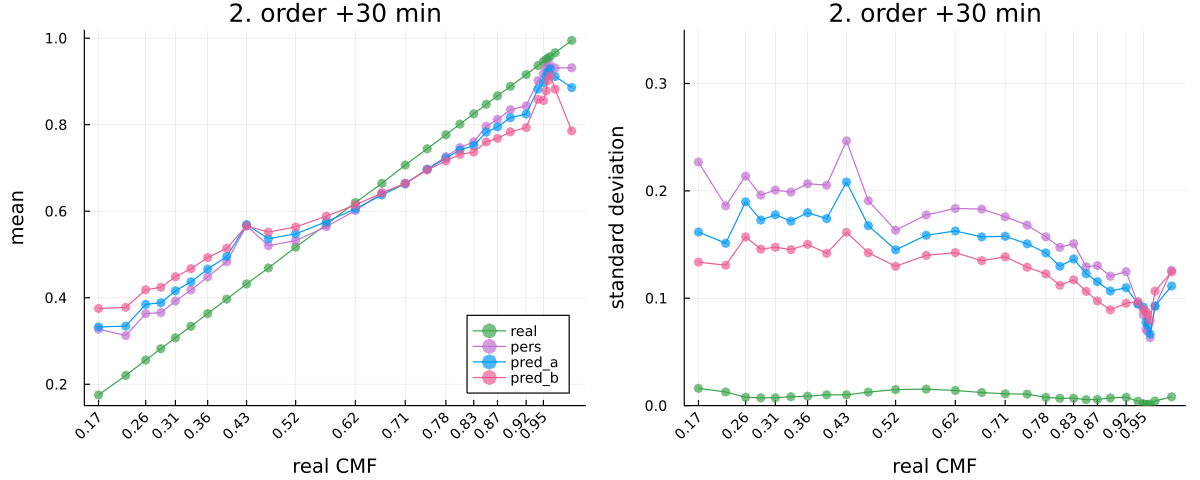

In [44]:
p = plot(mn2, sd2, marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b"],
    xticks=(binMean[1:2:26], ticks[1:2:26]), xrotation=45, 
    xlabel="real CMF", title="2. order +30 min",
    leftmargin=20px, bottommargin=20px, size=(1000,400))

### errors

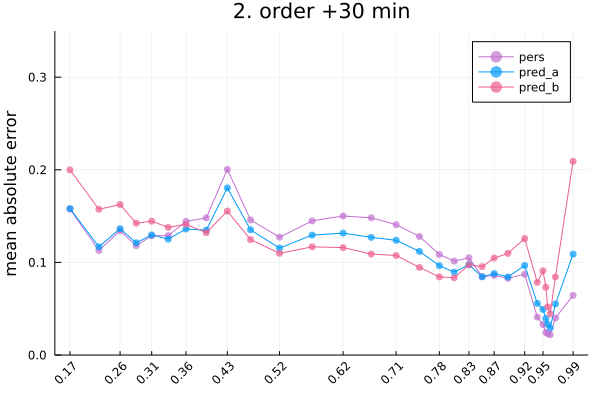

In [56]:
mae2 = viz_err(df22, binMean, xti; tit="2. order +$(15*2) min", err="mae")

In [53]:
mae3 = viz_err(df23, binMean, xti; tit="+$(15*3) min", err="mae")
mae4 = viz_err(df24, binMean, xti; tit="+$(15*4) min", err="mae")

rmse2 = viz_err(df22, binMean, xti; err="rmse")
rmse3 = viz_err(df23, binMean, xti; err="rmse")
rmse4 = viz_err(df24, binMean, xti; err="rmse");

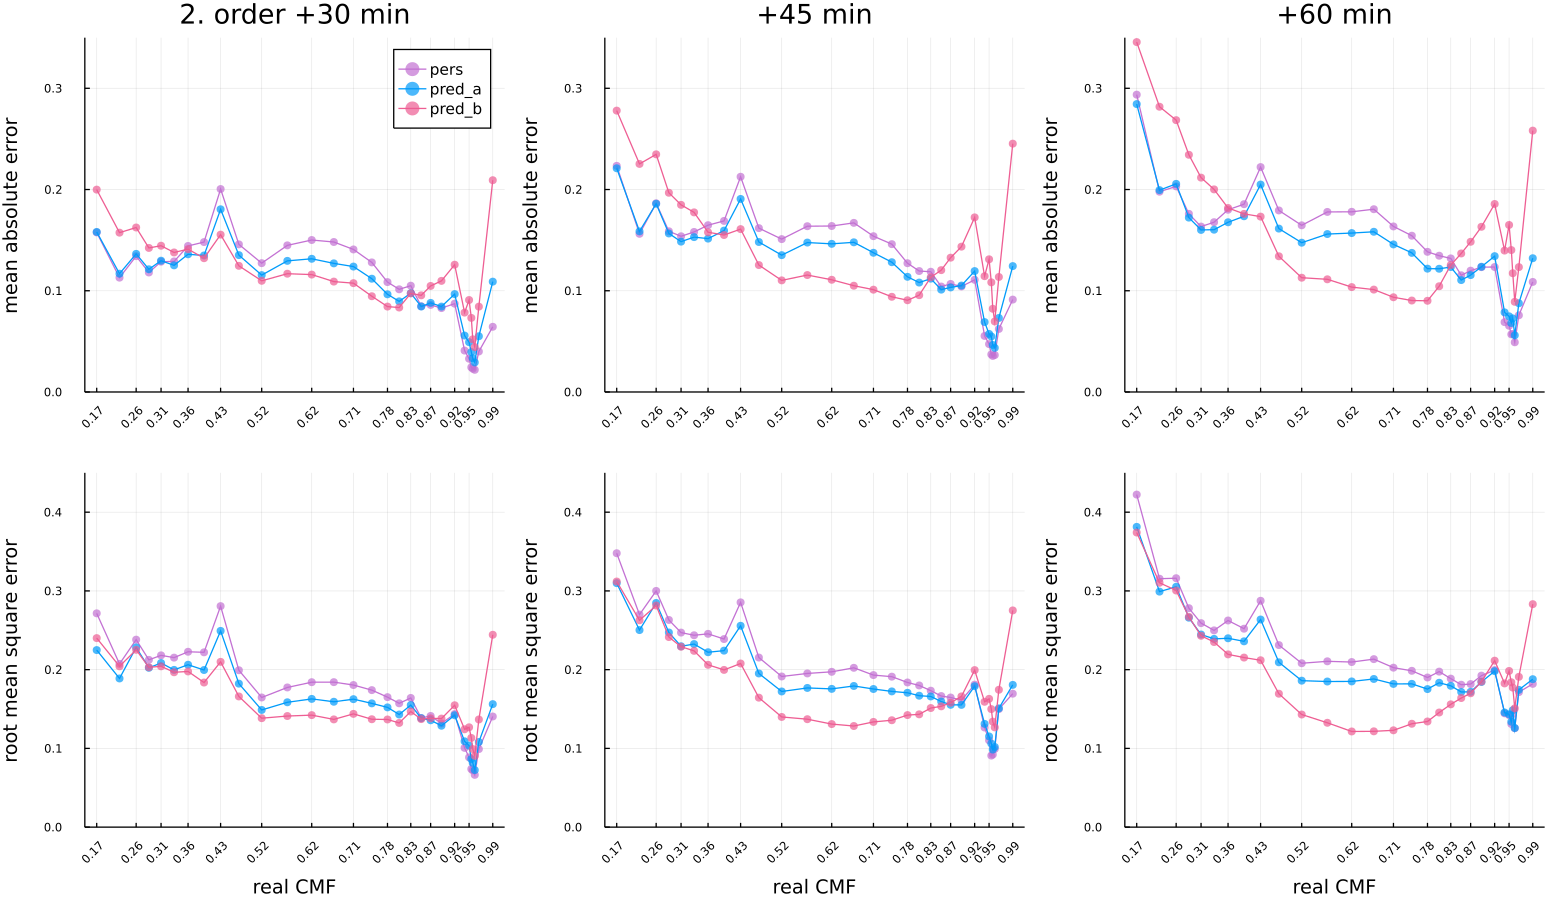

In [57]:
errs = plot(mae2, mae3, mae4, rmse2, rmse3, rmse4, layout=@layout([a b c; d e f]), 
    tickfontsize=6, labelfontsize=10,
    leftmargin=15px, bottommargin=15px, dpi=130, fmt=:png, size=(1200,700))

#### errors legacy

In [102]:
mae = viz_err(df21_, binMean, xti; tit="", err="mae")
rmse = viz_err(df21_, binMean, xti; tit="2. order +$(15*1) min", err="rmse")

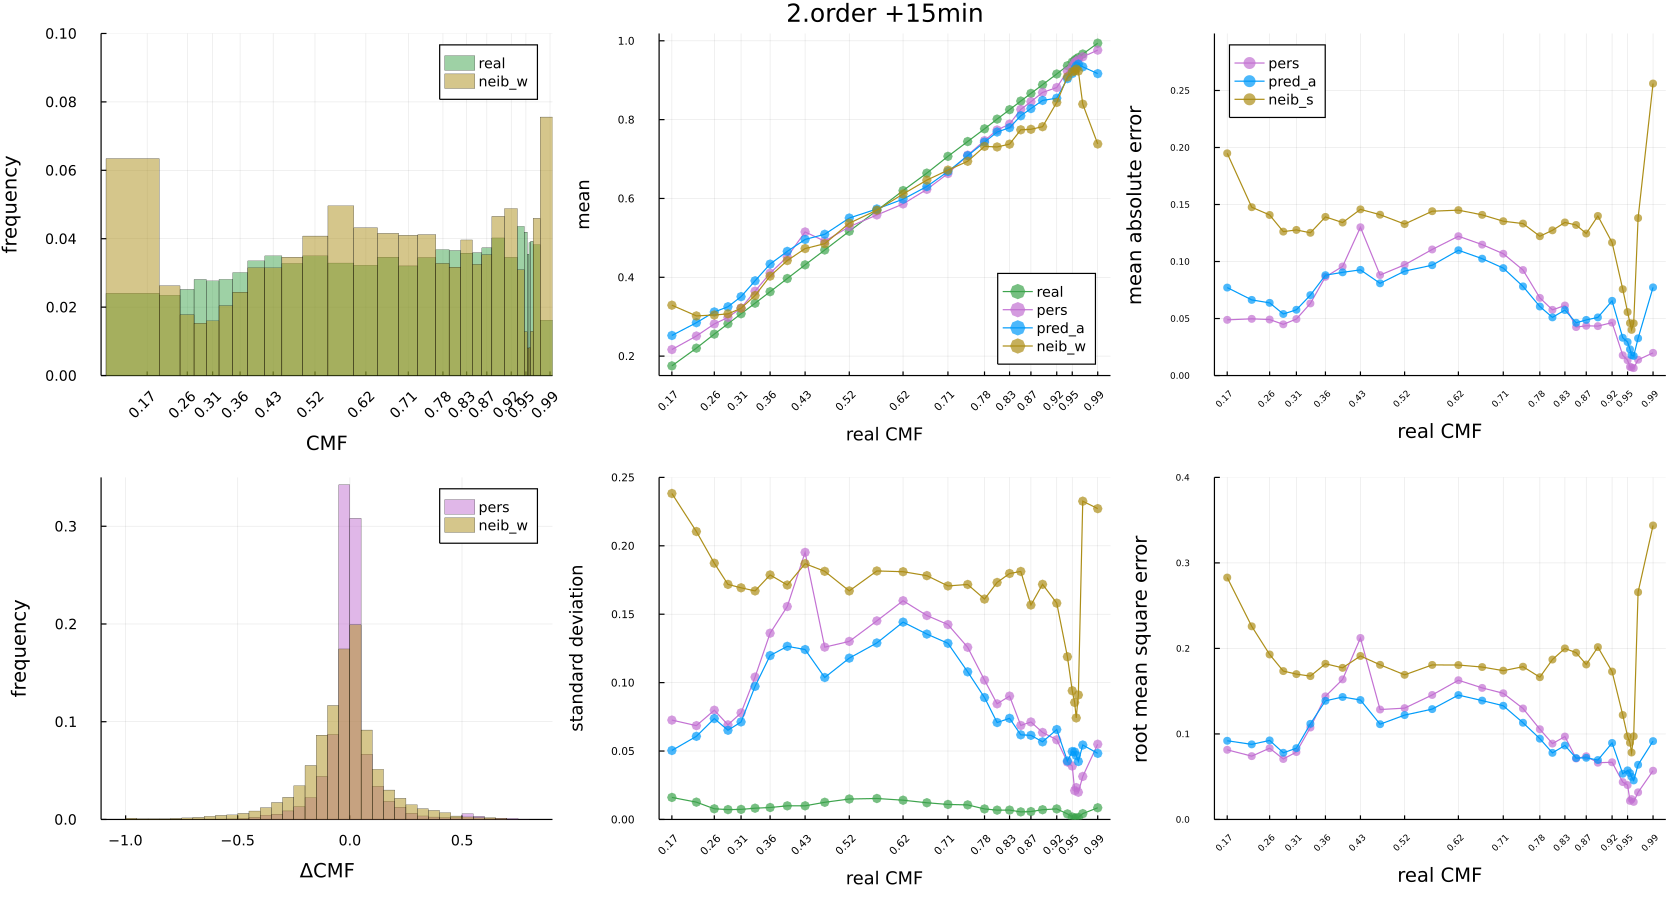

In [103]:
p = plot(h1, mns, mae, h2, sds, rmse, layout=@layout([a b c; d e f]), size=(1400, 750), fmt=:png,
        left_margin=20px, bottom_margin=20px)

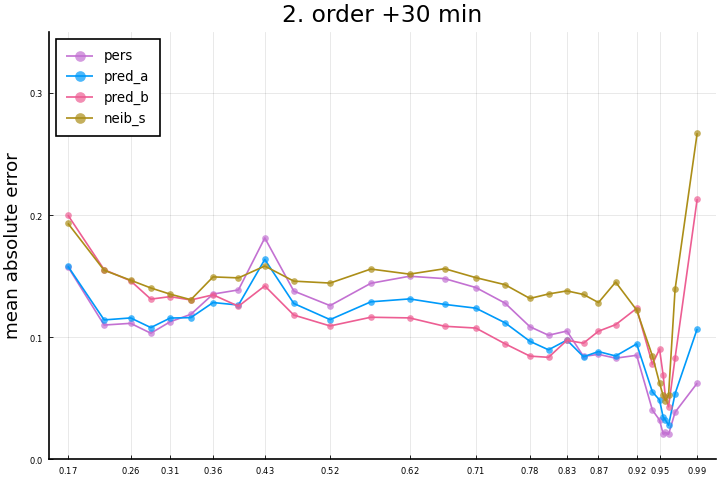

In [160]:
mae = viz_err(df22_, binMean, xti; tit="2. order +$(15*2) min", err="mae")

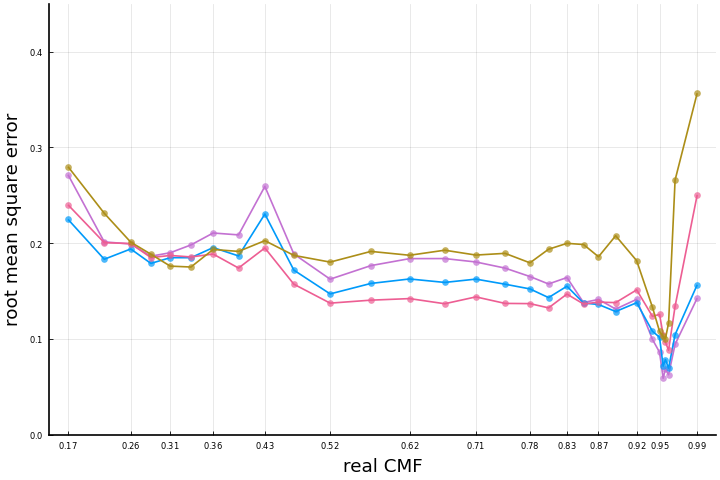

In [161]:
rmse = viz_err(df22_, binMean, xti; tit="2. order +$(15*2) min", err="rmse")

### boxplot

In [51]:
b21 = viz_box(df21, 1, "Berlin 2.order t+$(15*1) min")

b22 = viz_box(df22, 2, "t+$(15*2) min")
b23 = viz_box(df23, 3, "t+$(15*3) min")
b24 = viz_box(df24, 4, "t+$(15*4) min");

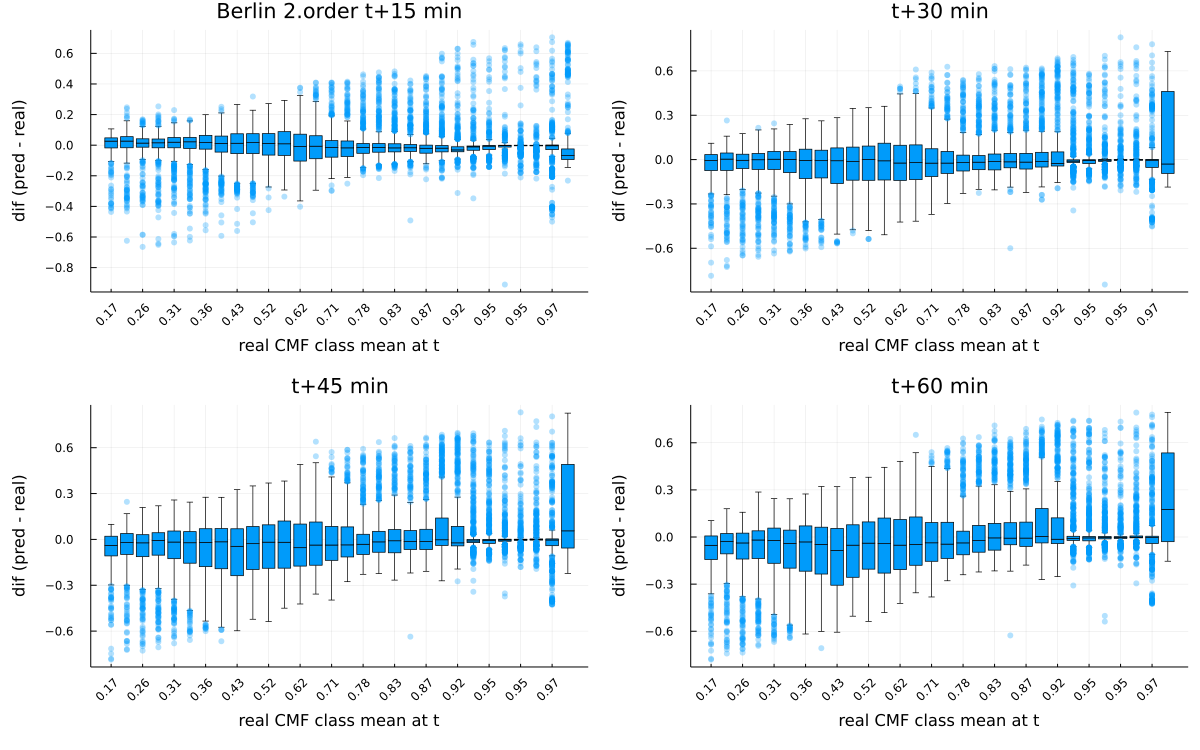

In [54]:
boxes2 = plot(b21, b22, b23, b24, layout=@layout([a b; c d]), size=(1200, 750), 
    left_margin=25px, bottom_margin=25px, fmt=:png)

### mn ± sd 

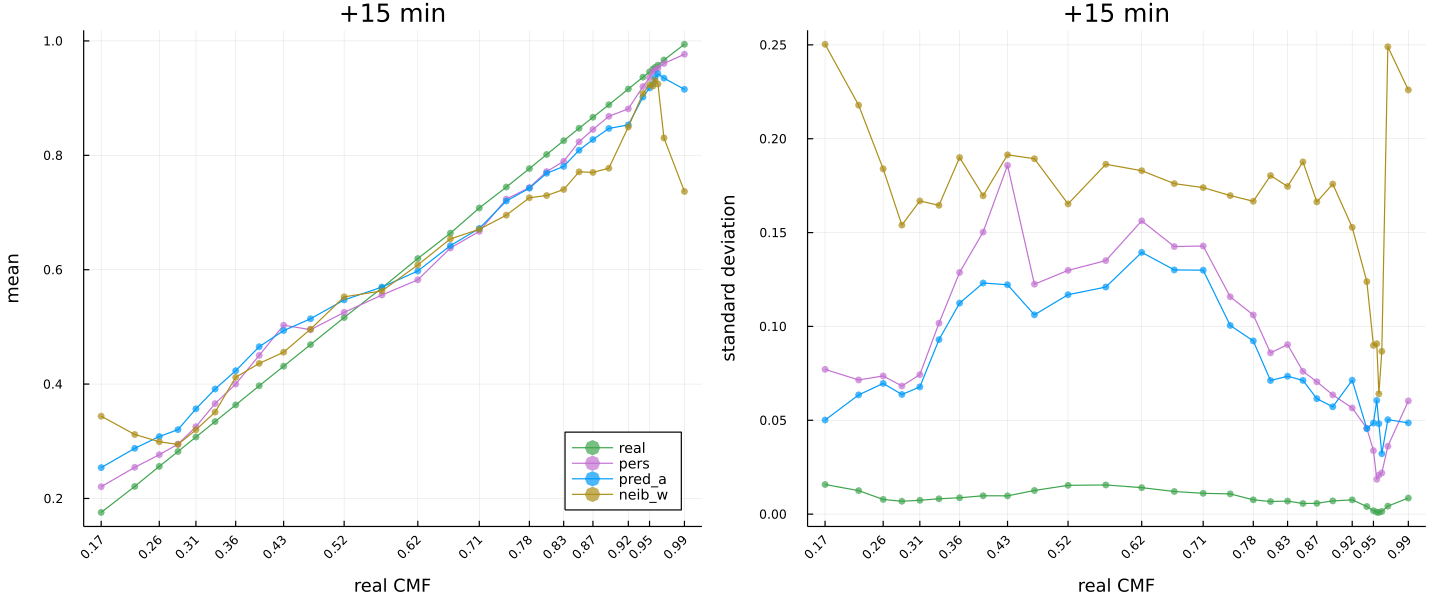

In [38]:
p_mn1 = viz_mn_sd(df21; tit="+$(15*1) min")

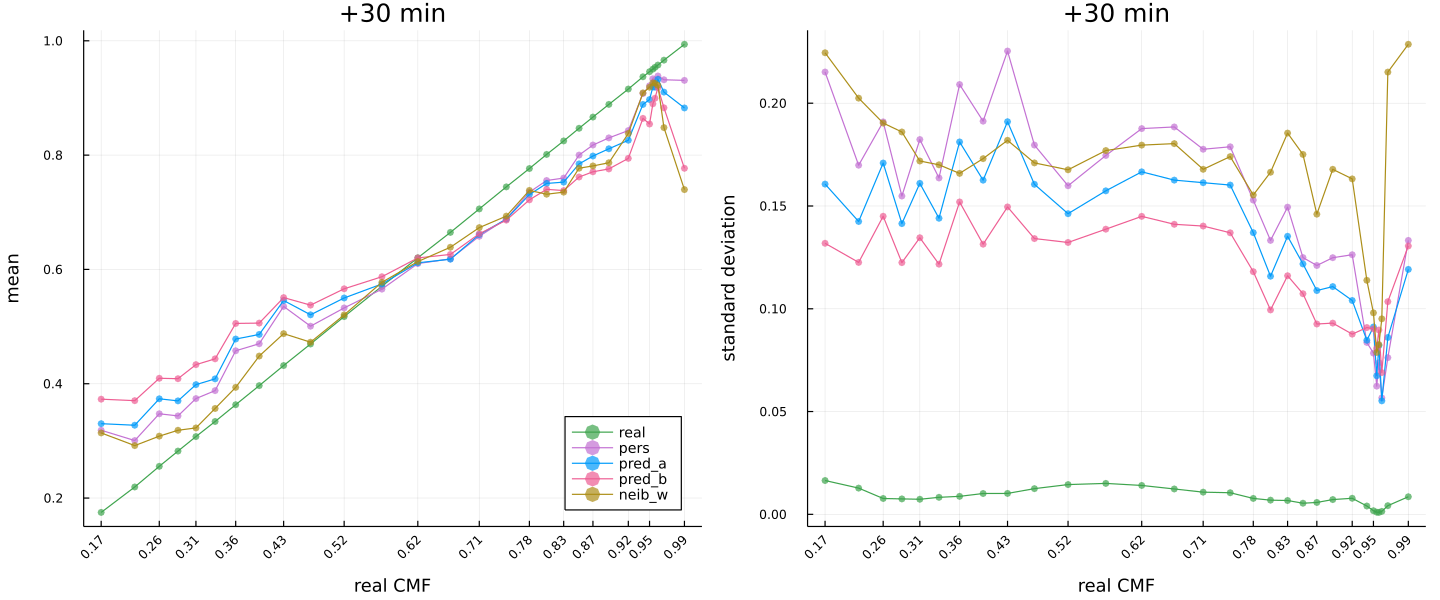

In [37]:
p_mn2 = viz_mn_sd(df22; tit="+30 min")

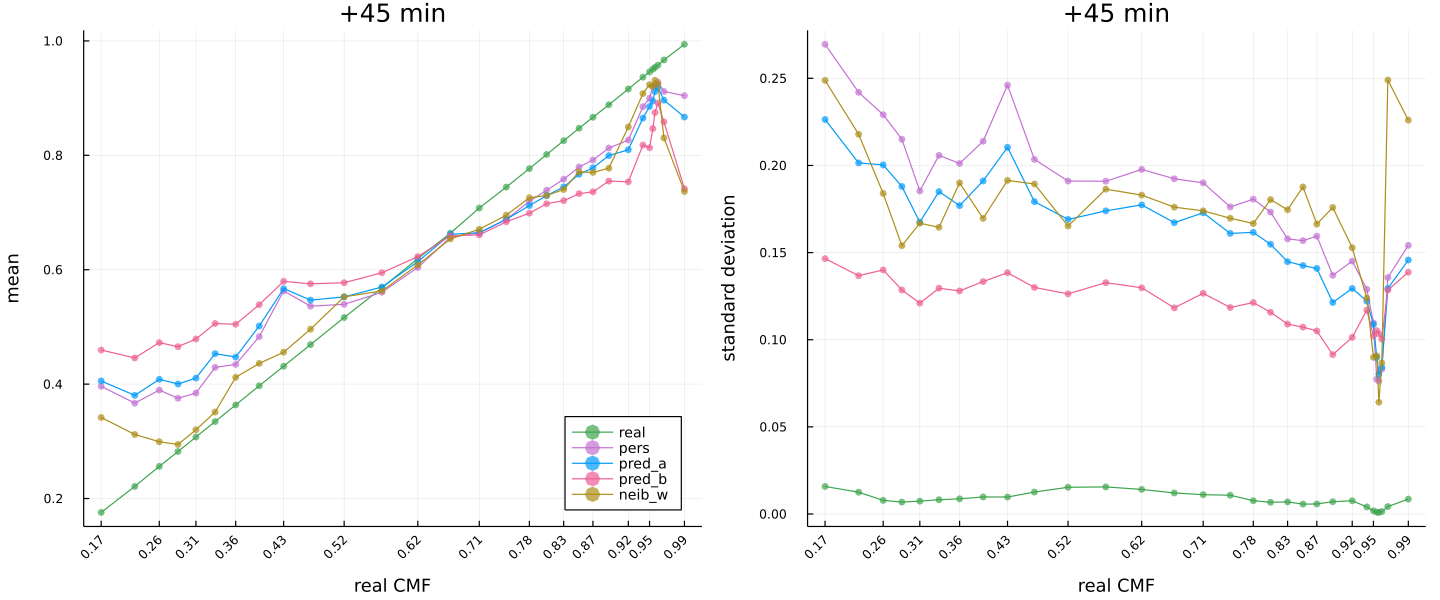

In [39]:
p_mn3 = viz_mn_sd(df23; tit="+$(15*3) min")

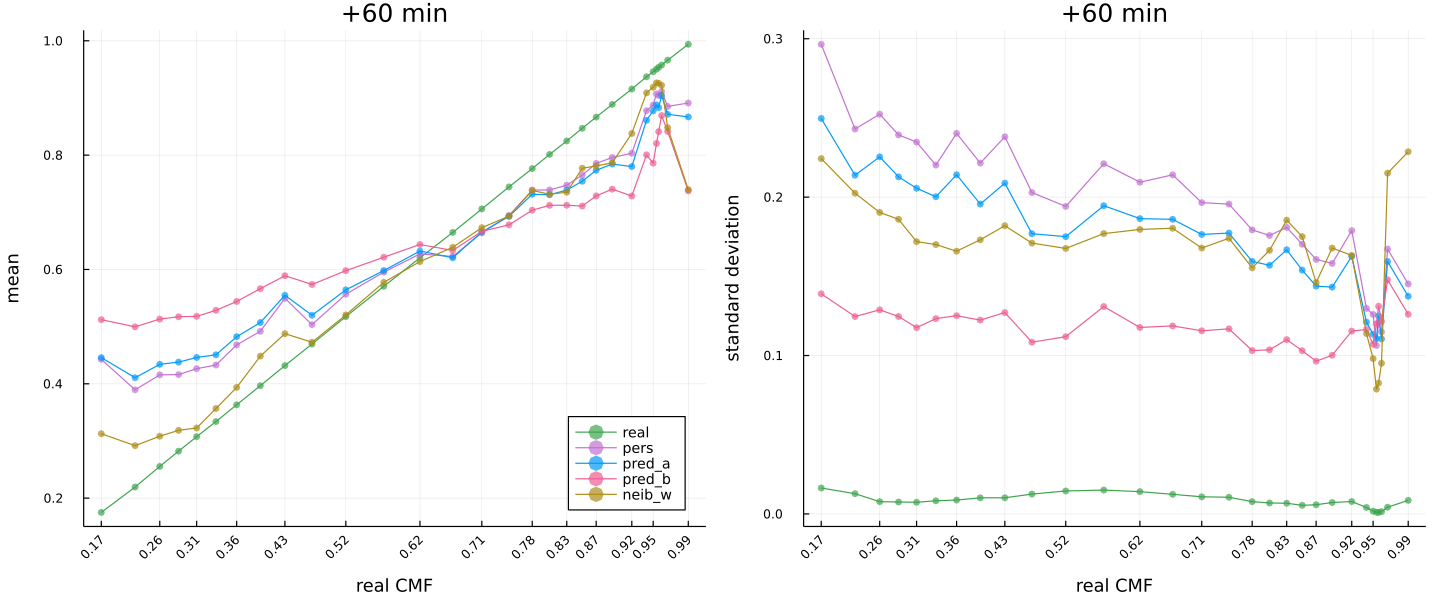

In [40]:
p_mn4 = viz_mn_sd(df24; tit="+$(15*4) min")

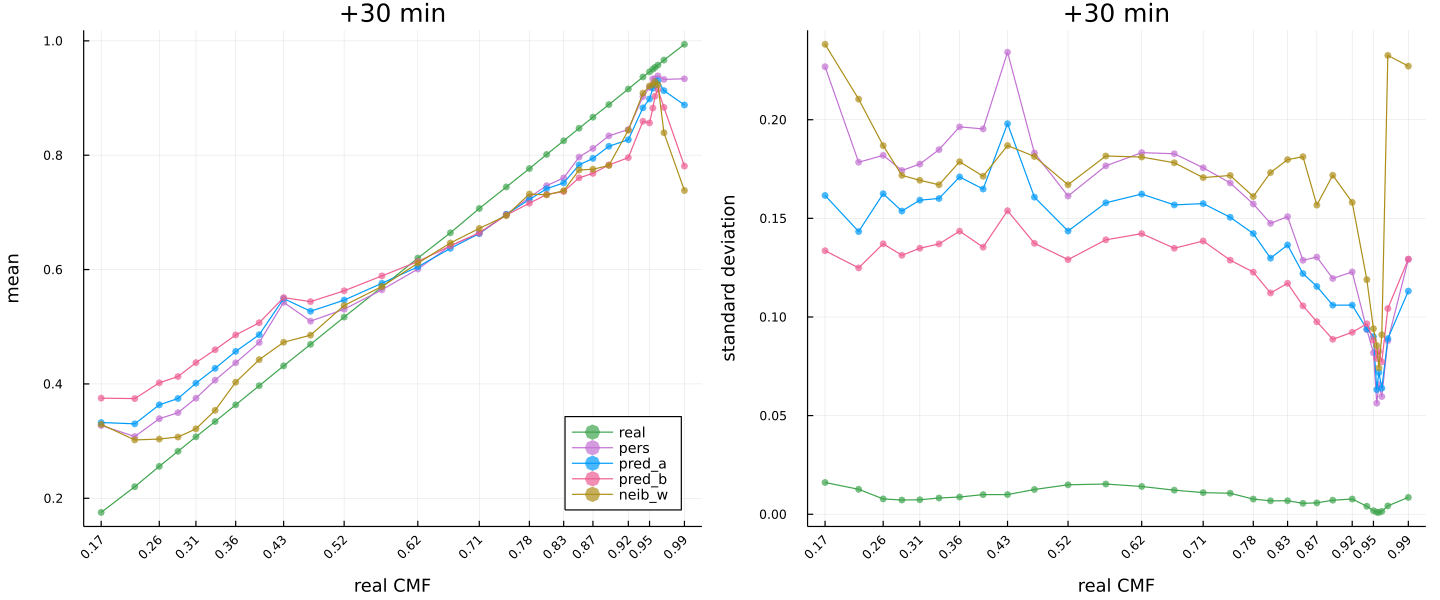

In [69]:
p = plot(mns, sds, xlabel="real CMF", xticks=xti, xrotation=45, 
    tickfontsize=7, labelfontsize=10, leftmargin=20px, bottommargin=20px, size=(1200, 500))

### Bias range

In [82]:
dff = df22[:, [:dif_pers, :dif_pred, :dif_pred_n, :dif_neib, :dif_hyb_m, :dif_hyb_r]]

8816×6 DataFrame
  Row │ dif_pers     dif_pred     dif_pred_n   dif_neib    dif_hyb_m    dif_hyb_r   
      │ Float64      Float64      Float64      Float64     Float64      Float64     
──────┼─────────────────────────────────────────────────────────────────────────────
    1 │  0.126488     0.120898     0.1333       0.435005    0.1333       0.1333
    2 │ -0.0971964   -0.026327     0.0416014   -0.0513477  -0.026327    -0.026327
    3 │  0.0573434    0.0989448    0.145973    -0.0469821   0.0989448    0.0989448
    4 │  0.00272383   0.0396683    0.101669    -0.0628862   0.0396683    0.0396683
    5 │ -0.00451154   0.0292287    0.0971571   -0.0759591   0.0292287    0.0292287
    6 │ -0.088423    -0.0591943    0.00873407  -0.0902705  -0.0591943   -0.0591943
    7 │ -0.0903167   -0.0637855   -0.0110659   -0.0689947  -0.0903167   -0.0689947
    8 │ -0.0281014    0.0214925    0.0455867    0.0623953   0.0214925    0.0455867
    9 │ -0.170942    -0.146626    -0.0886402   -0.0852479  -0.0886402   -0.0852479
   10 │ -0.228686    -0.192829    -0.148801    -0.210613   -0.148801    -0.148801
   11 │  0.350442     0.355512     0.355711     0.0919952   0.355711     0.355711
  ⋮   │      ⋮            ⋮            ⋮           ⋮            ⋮            ⋮
 8807 │ -0.164386    -0.117918    -0.082036    -0.266349   -0.082036    -0.082036
 8808 │  0.0330548    0.030065     0.0235049   -0.157679    0.0235049    0.0235049
 8809 │ -0.0340642   -0.0219492   -0.0105593   -0.276306   -0.0105593   -0.0105593
 8810 │  0.219517     0.208958     0.208958    -0.109714    0.208958     0.208958
 8811 │  0.134667     0.135562     0.164262    -0.0633513   0.164262     0.164262
 8812 │  0.00567275   0.0149818    0.0715711   -0.093524    0.0149818    0.0715711
 8813 │ -0.139856    -0.118667    -0.0682847   -0.170011   -0.118667    -0.0682847
 8814 │ -0.147758    -0.0832934   -0.0548304   -0.18533    -0.0548304   -0.0548304
 8815 │ -0.0609222   -0.0209103    0.00732246  -0.0898753   0.00732246   0.00732246
 8816 │ -0.202986    -0.202224    -0.202224    -0.278043   -0.202224    -0.202224
                                                                   8795 rows omitted

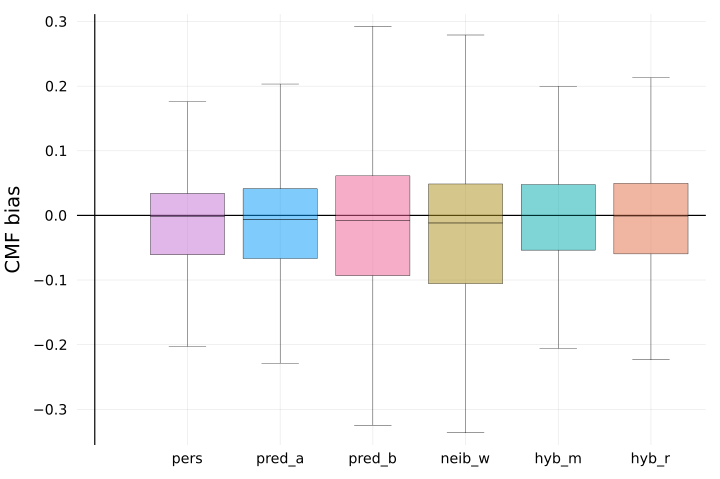

In [87]:
lab = ["pers", "pred_a", "pred_b", "neib_w", "hyb_m", "hyb_r"]
b = boxplot(Array(dff), leg=:none, frame=:zerolines, outliers=false, 
        c=[4 1 7 5 6 2], label=lab, xticks=(1:size(dff, 2), lab),
        fillalpha=0.5, lw=0.3, 
        ylabel="CMF bias") #, title=city)

### MAE vs RMSE

In [70]:
p2 = plot([maes_pers maes_pred maes_hyb maes_hyb_r], [rmses_pers rmses_pred rmses_hyb rmses_hyb_r], marker=(0.7, stroke(0)), 
    c=[4 1 2 9], label=["pers" "pred_a" "hybr_m" "hybr_r"], leg=:topleft,
    xlim=(0,0.22), ylim=(0,0.22),
    xlabel="MAE", ylabel="RMSE", title="Berlin 2.order")
plot!([maes_pred_n], [rmses_pred_n], c=[7 2 9], label="pred_b", marker=(0.7, stroke(0)), size=(670, 650), dpi=:120, fmt=:png)

annotate!(0.06, 0.095, text("+15 min", 8))
annotate!(0.11, 0.145, text("+$(15*2) min", 8))
# annotate!(0.1, 0.2, text("+$(15*3) min", 8))
annotate!(0.155, 0.21, text("+$(15*4) min", 8));

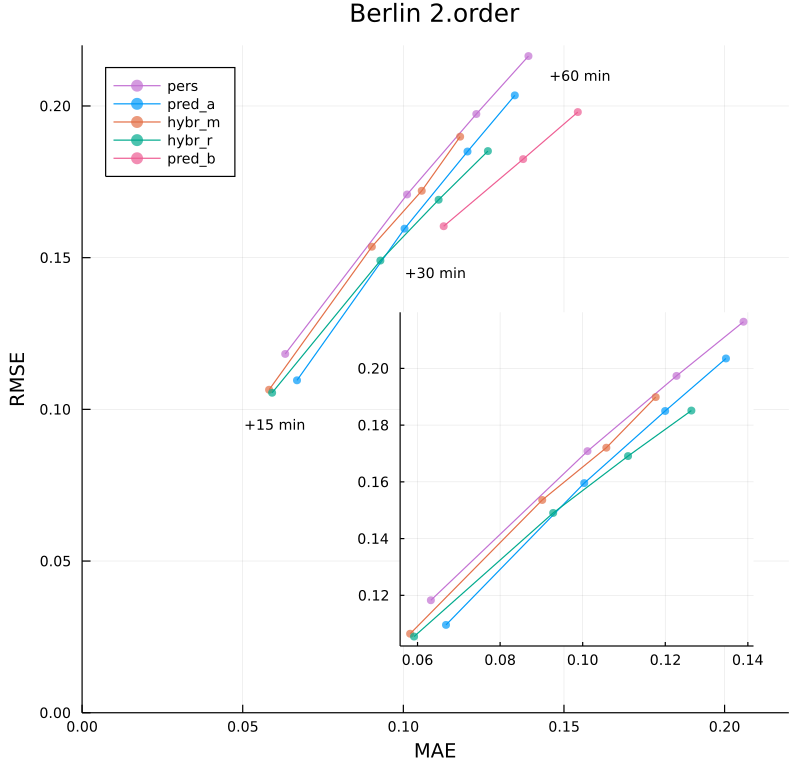

In [71]:
bb = bbox(0.45, 0.4, 0.5, 0.5)
plot!([maes_pers maes_pred maes_hyb maes_hyb_r], [rmses_pers rmses_pred rmses_hyb rmses_hyb_r], marker=(0.7, stroke(0)), 
    c=[4 1 2 9], leg=:none, inset=(1, bb), subplot=2)
# plot!(maes_pred_n, rmses_pred_n, c=7, marker=(0.7, stroke(0)), inset=(1, bb)) #, subplot=2)

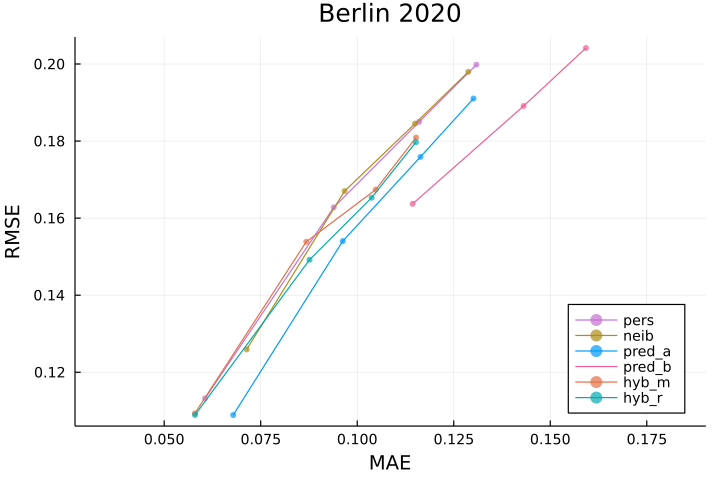

In [82]:
errs = mae_vs_rmse(df1t, df2t, df3t, df4t; tit=city*" 2020")

### Err by CMF class

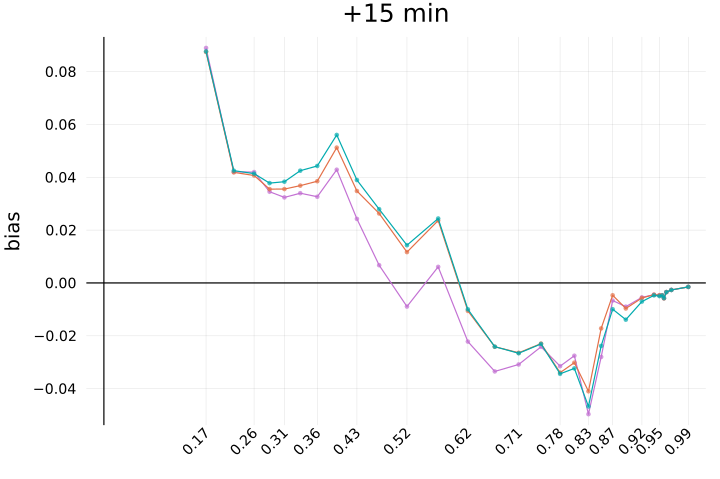

In [179]:
bi1 = viz_bias_by_cls(df1t, 1)

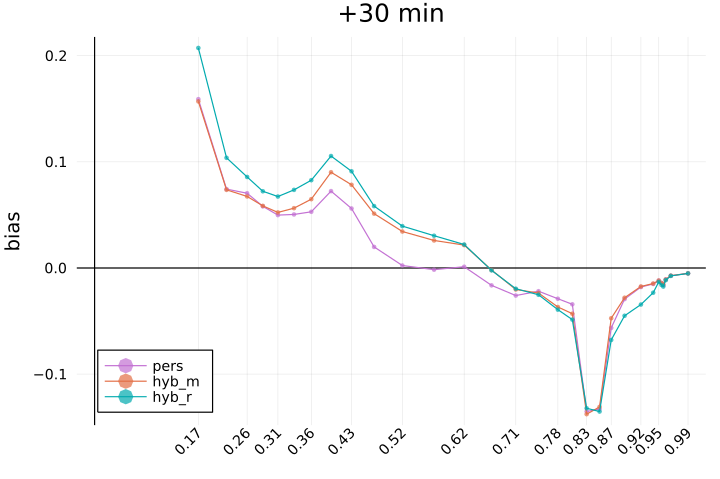

In [180]:
bi2 = viz_bias_by_cls(df2t, 2)

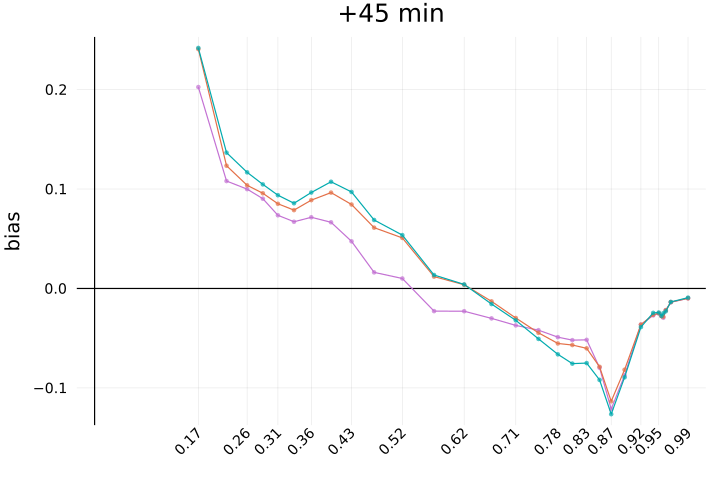

In [181]:
bi3 = viz_bias_by_cls(df3t, 3)

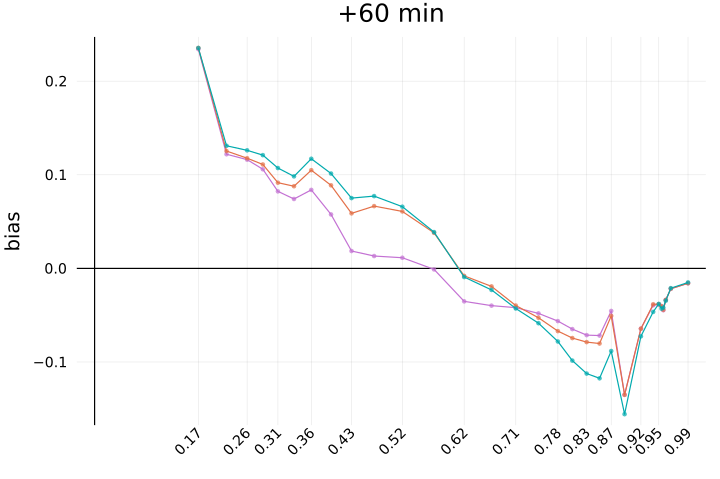

In [182]:
bi4 = viz_bias_by_cls(df4t, 4)

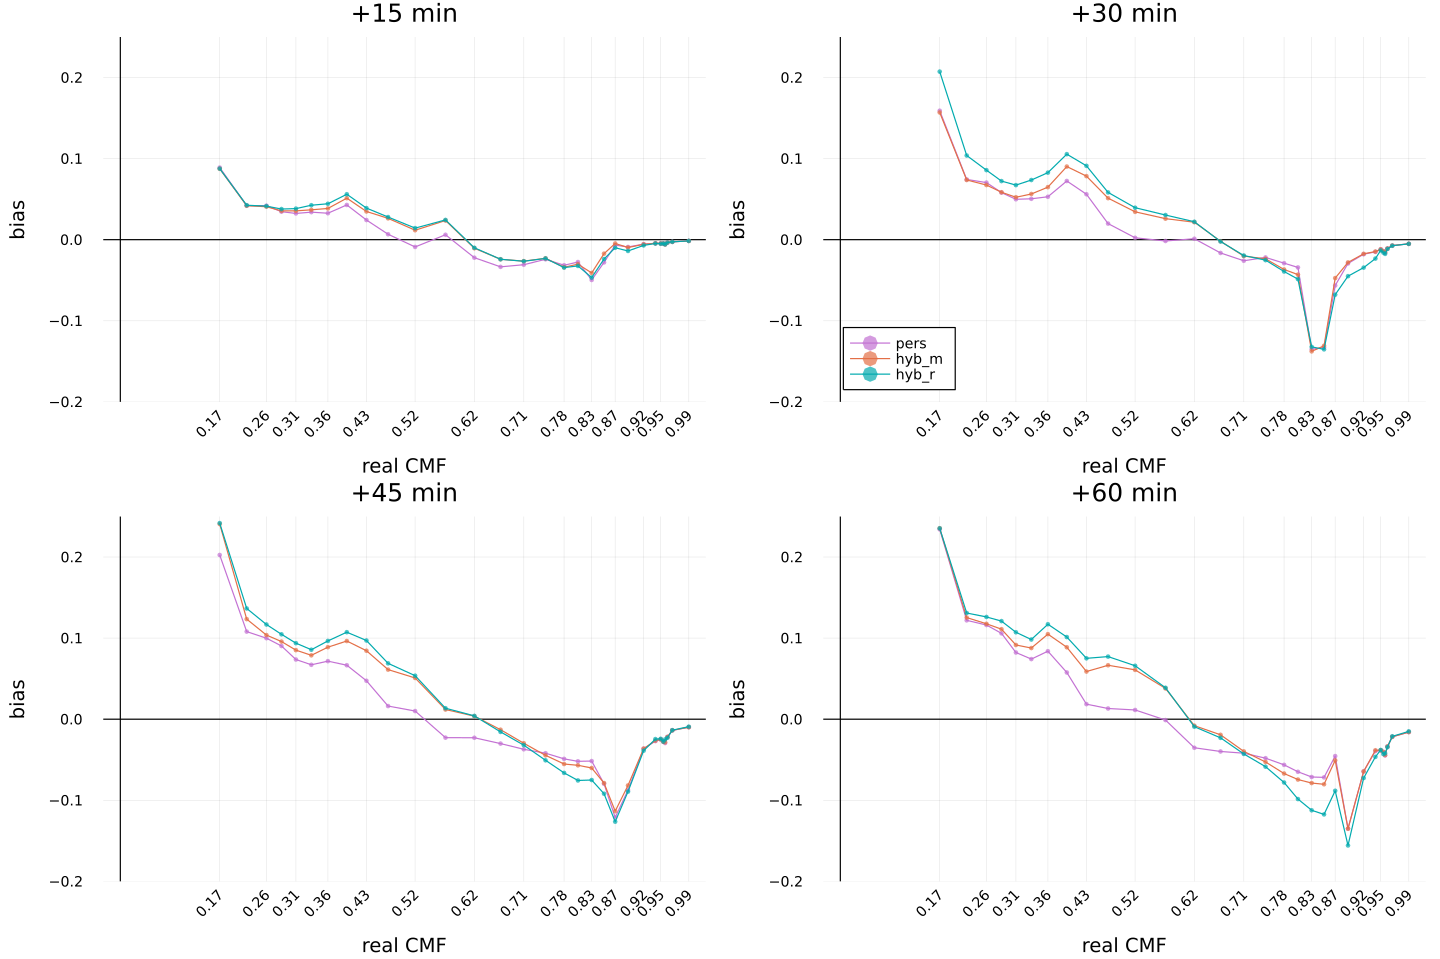

In [183]:
bias = plot(bi1, bi2, bi3, bi4, layout=@layout([a b; c d]), size=(1200, 800), 
    frame=:zerolines, leftmargin=20px, ylim=(-0.2, 0.25), 
    xlabel="real CMF", ylabel="bias", xticks=xti, xrotation=45)

#### bias legacy

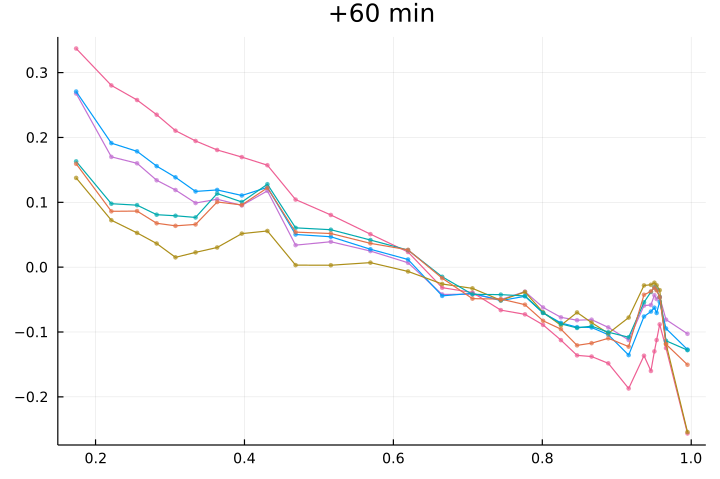

In [96]:
bi1 = viz_bias(df21; tit="+$(15*1) min")
bi2 = viz_bias(df22; tit="+$(15*2) min")
bi3 = viz_bias(df23; tit="+$(15*3) min")
bi4 = viz_bias(df24; tit="+$(15*4) min")

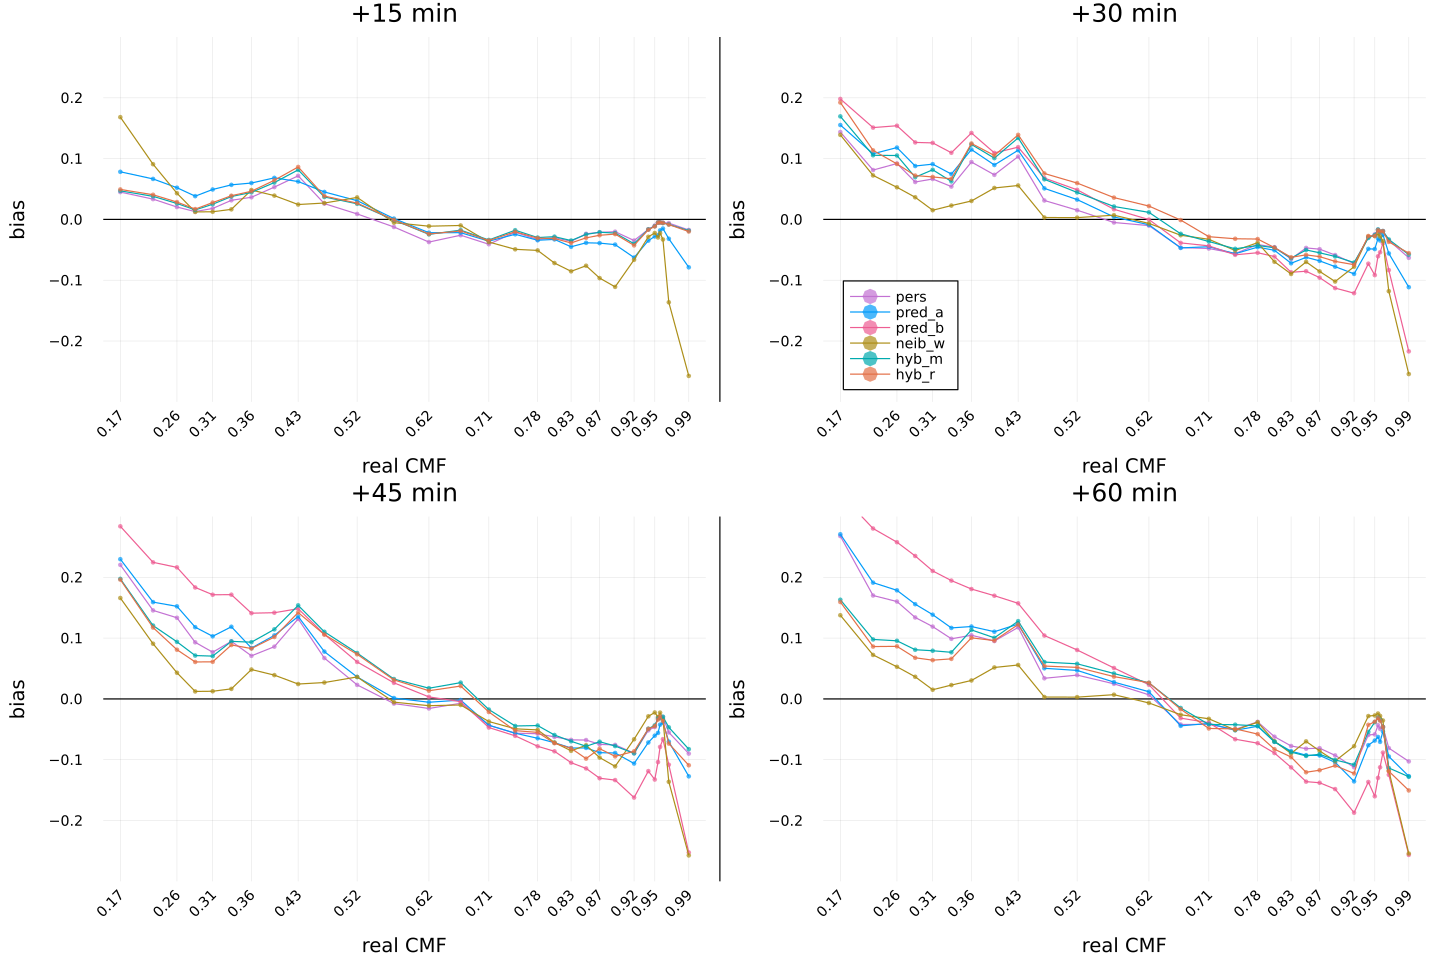

In [97]:
bias = plot(bi1, bi2, bi3, bi4, layout=@layout([a b; c d]), size=(1200, 800), 
    frame=:zerolines, leftmargin=20px, ylim=(-0.3, 0.3), 
    xlabel="real CMF", ylabel="bias", xticks=xti, xrotation=45)

In [209]:
mae1 = viz_err1(df1t, binMean, xti; tit="+$(15*1) min")
mae2 = viz_err1(df2t, binMean, xti; tit="+$(15*2) min")
mae3 = viz_err1(df3t, binMean, xti; tit="+$(15*3) min")
mae4 = viz_err1(df4t, binMean, xti; tit="+$(15*4) min");

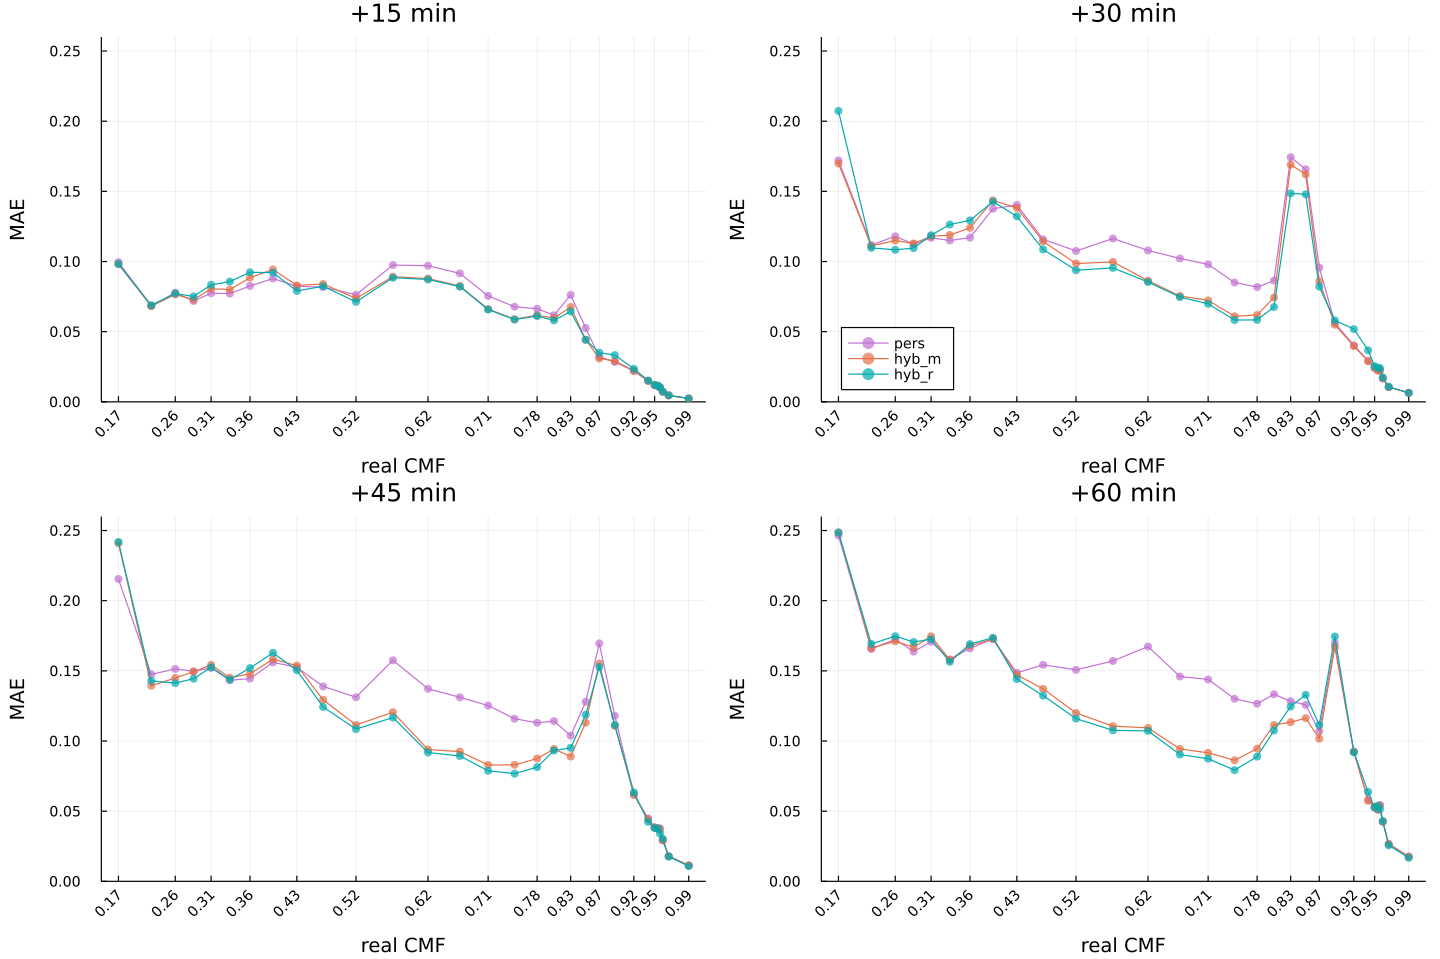

In [211]:
maes = plot(mae1, mae2, mae3, mae4, layout=@layout([a b; c d]), size=(1200, 800), 
    leftmargin=20px, ylim=(0, 0.26))

In [221]:
rmse1 = viz_err1(df1t, binMean, xti; tit="+$(15*1) min", err="rmse")
rmse2 = viz_err1(df2t, binMean, xti; tit="+$(15*2) min", err="rmse")
rmse3 = viz_err1(df3t, binMean, xti; tit="+$(15*3) min", err="rmse")
rmse4 = viz_err1(df4t, binMean, xti; tit="+$(15*4) min", err="rmse");

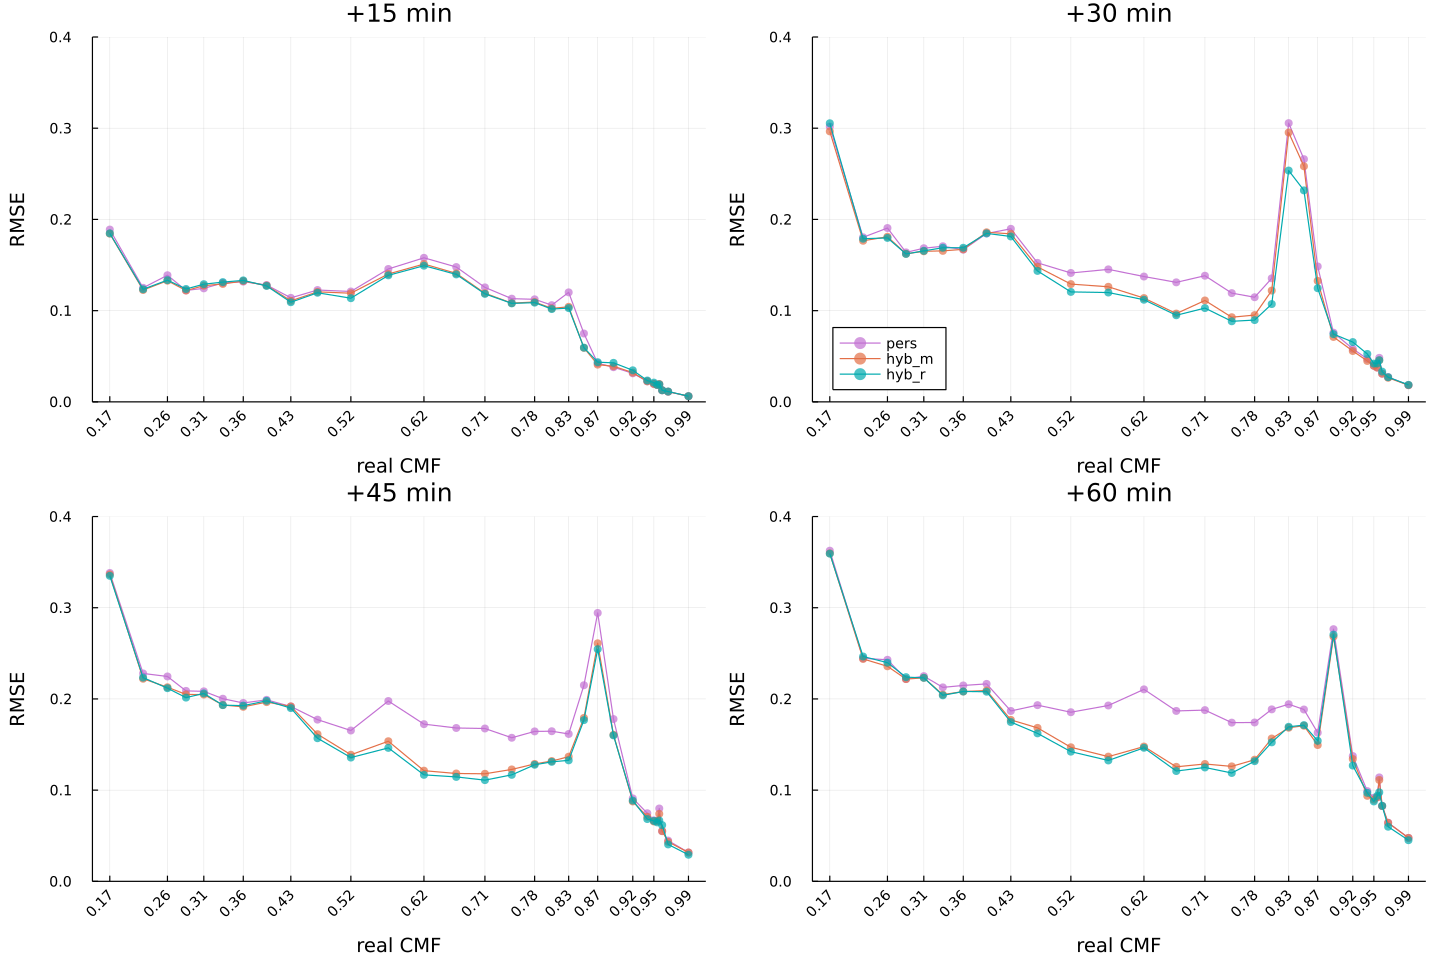

In [222]:
rmses = plot(rmse1, rmse2, rmse3, rmse4, layout=@layout([a b; c d]), size=(1200, 800), 
    leftmargin=20px, ylim=(0, 0.4))

### CMF -> GHI

In [223]:
df1g = getGHI(df1t, 1)

17634×7 DataFrame
   Row │ month  ghi       ghi_pers   ghi_neib   ghi_pred   ghi_hyb_m  ghi_hyb_r 
       │ Int8   Float64   Float64    Float64    Float64    Float64    Float64   
───────┼────────────────────────────────────────────────────────────────────────
     1 │     1   6.11257   4.6383     4.62108    4.92103    4.6383     4.6383
     2 │     1   7.99856  10.6094    10.5904    10.5826    10.5826    10.5826
     3 │     1   9.64207  11.6091    11.507     11.1998    11.1998    11.1998
     4 │     1   9.37202  12.6611    12.866     12.9254    12.9254    12.9254
     5 │     1  11.5218   11.5397    12.5593    12.4975    12.4975    12.4975
     6 │     1  14.7725   13.5238    16.447     14.8071    14.8071    14.8071
     7 │     1  15.687    16.7349    20.2407    19.1135    19.1135    19.1135
     8 │     1  15.4328   17.3263    21.2457    18.2869    18.2869    18.2869
     9 │     1  15.8647   16.6962    20.7866    17.1657    16.6962    16.6962
    10 │     1  19.6424   16.8695    21.0996    18.1001    16.8695    16.8695
    11 │     1  24.0906   20.568     27.0704    23.9904    23.9904    23.9904
   ⋮   │   ⋮       ⋮          ⋮          ⋮          ⋮          ⋮          ⋮
 17625 │    12  36.4291   38.8371    38.2085    37.5039    38.8371    38.8371
 17626 │    12  31.5607   33.1193    34.209     31.1154    31.1154    31.1154
 17627 │    12  28.0762   28.0114    30.1601    27.3292    27.3292    27.3292
 17628 │    12  25.564    24.1706    26.8989    23.938     23.938     23.938
 17629 │    12  22.0262   21.1338    22.4428    21.3376    21.3376    21.3376
 17630 │    12  17.8653   17.1978    17.5921    17.1462    17.1462    17.1462
 17631 │    12  12.7699   12.785     12.8629    12.7796    12.785     12.7796
 17632 │    12   7.58499   7.87246    7.87814    7.77422    7.87246    7.77422
 17633 │    12   2.93009   3.4161     3.42053    3.28675    3.28675    3.28675
 17634 │    12   0.17233   0.442887   0.443074   0.413404   0.413404   0.413404
                                                              17613 rows omitted

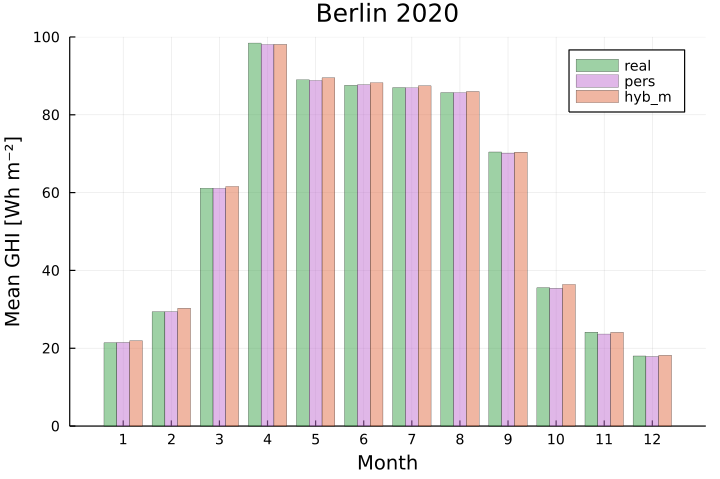

In [239]:
gb = groupby(df2g, :month)
ghi = [mean(g.ghi) for g in gb]
ghi_pers = [mean(g.ghi_pers) for g in gb]
ghi_hyb_m = [mean(g.ghi_hyb_m) for g in gb];

gb2 = groupedbar(1:12, [ghi ghi_pers ghi_hyb_m], lw=0.2, fillalpha=0.5, 
    c=[3 4 2], label=["real" "pers" "hyb_m"], ylim=(0, 100),
    xticks=1:12, xlabel="Month", ylabel="Mean GHI [Wh m⁻²]", title=city*" 2020")

In [224]:
df2g = getGHI(df2t, 2)
df3g = getGHI(df3t, 3)
df4g = getGHI(df4t, 4);

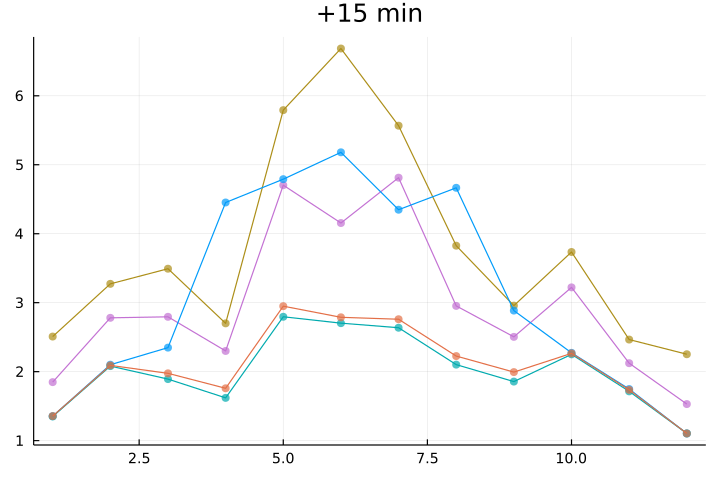

In [37]:
pg1 = viz_ghi_err(df1g, 1; tit="+$(15*1) min")

In [39]:
pg2 = viz_ghi_err(df2g, 2; tit="+$(15*2) min")
pg3 = viz_ghi_err(df3g, 3; tit="+$(15*3) min")
pg4 = viz_ghi_err(df4g, 4; tit="+$(15*4) min");

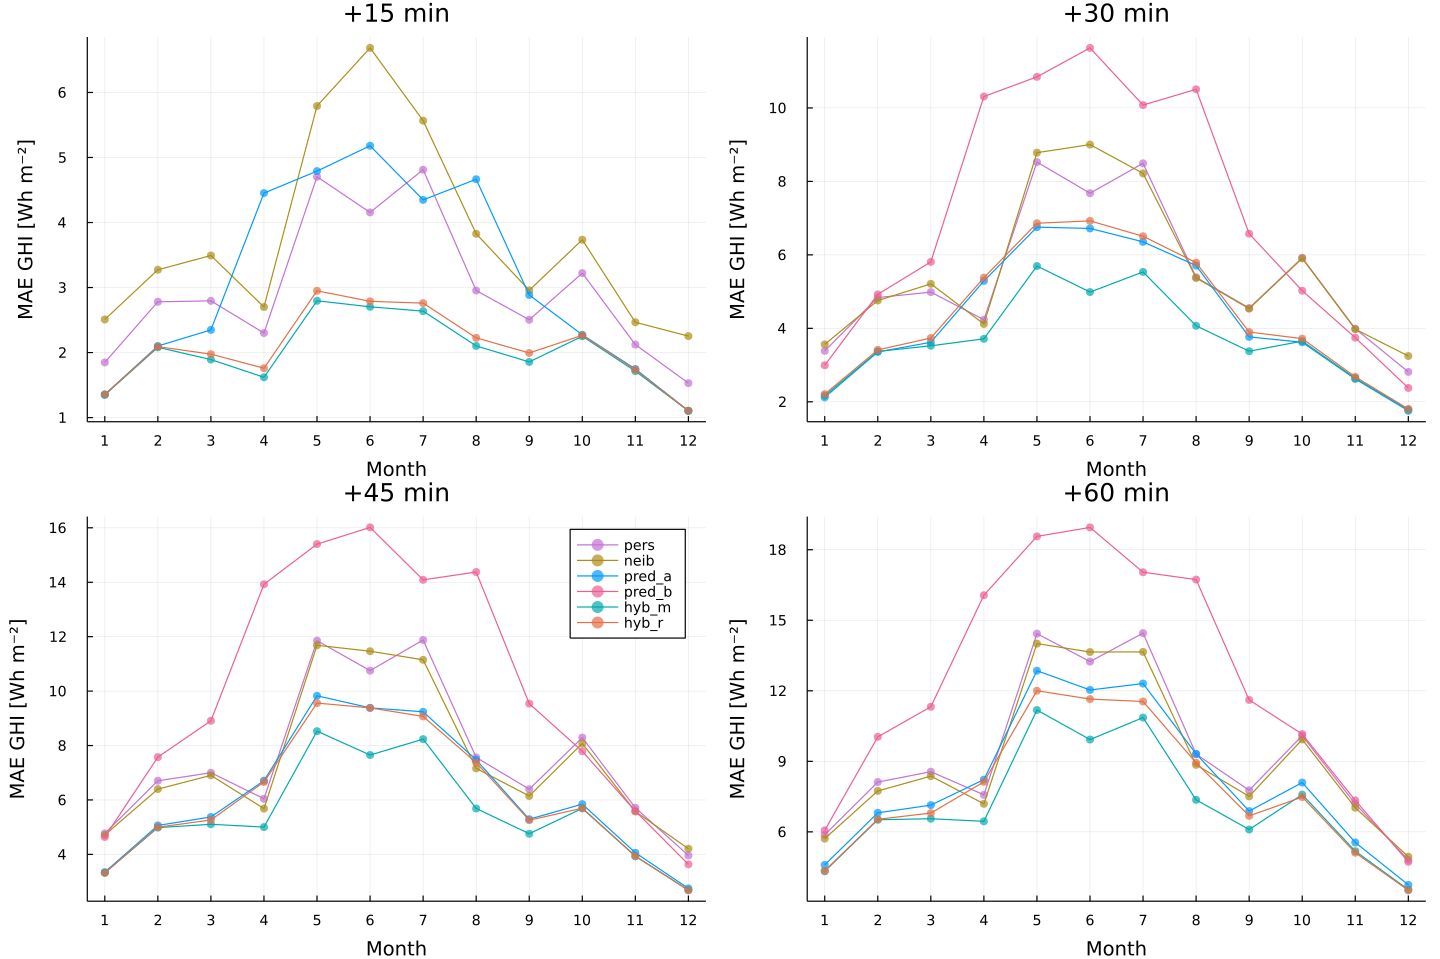

In [40]:
ps_ghi_mae = plot(pg1, pg2, pg3, pg4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), 
    xtick=1:12, xlabel="Month", ylabel="MAE GHI [Wh m⁻²]")

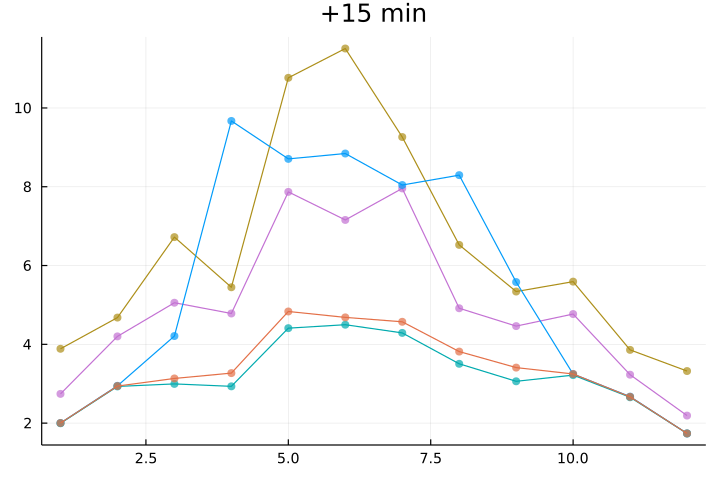

In [51]:
pgr1 = viz_ghi_err(df1g, 1; tit="+$(15*1) min", err="rmse")

In [49]:
pgr2 = viz_ghi_err(df2g, 2; tit="+$(15*2) min", err="rmse")
pgr3 = viz_ghi_err(df3g, 3; tit="+$(15*3) min", err="rmse")
pgr4 = viz_ghi_err(df4g, 4; tit="+$(15*4) min", err="rmse");

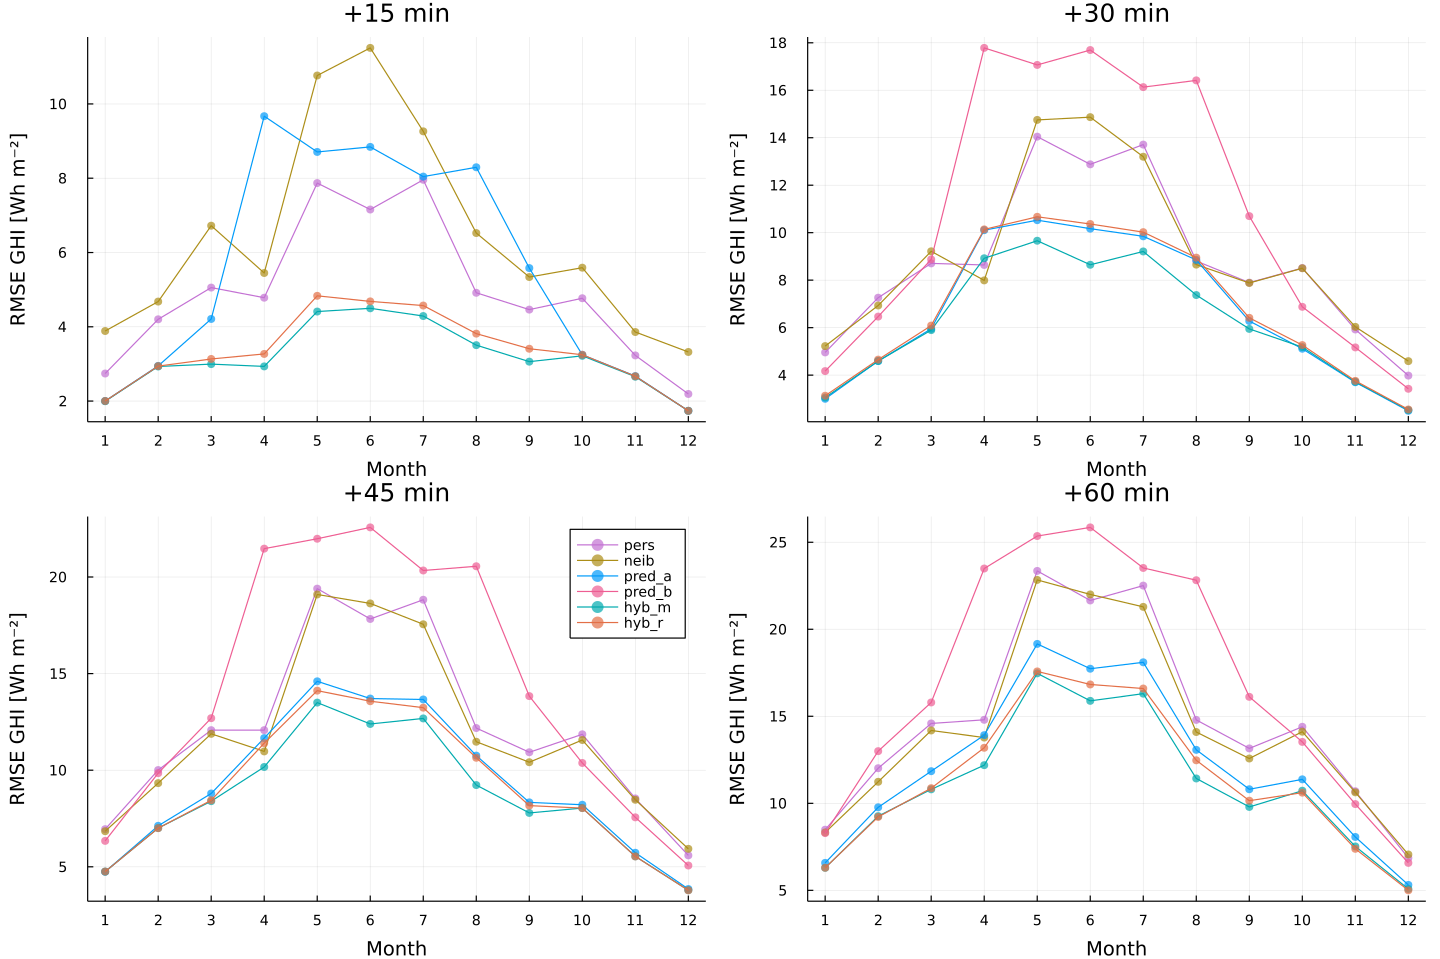

In [52]:
ps_ghi_rmse = plot(pgr1, pgr2, pgr3, pgr4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), 
    xtick=1:12, xlabel="Month", ylabel="RMSE GHI [Wh m⁻²]")